In [3]:
import pertpy as pt
import pickle as pkl
import scanpy as sc
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
import seaborn as sns
from scipy import stats
from scipy import sparse 
from statsmodels.sandbox.stats.multicomp import multipletests
# works with pertpy 0.4.0 DO NOT UPDATE 

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
%load_ext autoreload
%autoreload 2

import importlib
importlib.reload(pt)

import session_info
session_info.show(html=False, dependencies=True)

Installed version 0.4.0 of pertpy is outdated. Newest version is 0.5.0!

-----
matplotlib          3.7.1
numpy               1.23.5
pandas              1.5.3
pertpy              0.4.0
scanpy              1.9.3
scipy               1.10.1
seaborn             0.11.2
session_info        1.0.0
statsmodels         0.13.5
-----
PIL                         9.4.0
PyQt5                       NA
adjustText                  NA
anndata                     0.8.0
appnope                     0.1.3
arrow                       1.2.3
arviz                       0.14.0
asttokens                   NA
backcall                    0.2.0
certifi                     2022.12.07
cffi                        1.15.1
cftime                      1.6.2
charset_normalizer          3.1.0
comm                        0.1.2
custom_inherit              2.4.1
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.6.6
decorator                   5.1.1
decoupler                   1.3.4
ete3                        3.1.2
execut

In [5]:
infile =  "output/tumor_pre_DLG_normalizeTrue_bssolver_071023_mcp4_ranked_genes.pkl"
with open(infile, 'rb') as file:
    mcp4 = pkl.load(file)
file.close()


In [6]:
intx_high = {}
intx_low = {}
keepcts = ["t_CD4_Tcm-LMNA",  "t_pB-IGHG1","t_Bmem-CD27","t_CD8_MAIT-KLRB1" , "t_Tn-LEF1" ]
for ct in mcp4:
    if ct in keepcts:
        intx_high[ct] = mcp4[ct][mcp4[ct]['pvals_adj']<0.01]
        intx_low[ct] = intx_high[ct]
        intx_high[ct] = intx_high[ct][intx_high[ct]["logfoldchanges"]>0]
        intx_low[ct] = intx_low[ct][intx_low[ct]["logfoldchanges"]<0]
    #intx_high[]

In [7]:
pairs = pd.read_csv("Human-2019-Browaeys-LR-pairs/NicheNet-LR-pairs.csv", index_col=0)

In [8]:
pairs

,from,to,source,database
1,CXCL1,CXCR2,kegg_cytokines,kegg
2,CXCL2,CXCR2,kegg_cytokines,kegg
3,CXCL3,CXCR2,kegg_cytokines,kegg
4,CXCL5,CXCR2,kegg_cytokines,kegg
5,PPBP,CXCR2,kegg_cytokines,kegg
...,...,...,...,...
12655,CXCL6,PIGR,ppi_lr_go,ppi_prediction_go
12656,RLN1,GPR25,ppi_lr_go,ppi_prediction_go
12657,RLN1,RAMP3,ppi_lr_go,ppi_prediction_go
12658,PIK3CB,TNFRSF10A,ppi_bidir_r_go,ppi_prediction_go


In [47]:
adata=sc.read_h5ad("output/tumor_pre_DLG_normalizeTrue_bssolver_071023_mini_adata.h5ad")

In [10]:
cts = list(intx_high.keys())

In [11]:
def check_interactions(send_df, receive_df, int_df=pairs):
    # check ct1 sending
    senders = send_df[send_df['names'].isin(pairs['from'])]['names']
    possible_receivers = pairs[pairs['from'].isin(senders)]
    #print(possible_receivers)
    receivers = receive_df[receive_df['names'].isin(possible_receivers)]
    return(receivers)


In [12]:
putative_interactions = {}
for i in range(len(cts)):
    for j in range(i,len(cts)):
        ct1 = intx_high[cts[i]]
        ct2 = intx_high[cts[j]]
        matches = check_interactions(ct1,ct2)
        if len(matches) > 0:
            putative_interactions["something"] = matches

In [13]:
putative_interactions

{}

In [14]:
putative_interactions = {}
for i in range(len(cts)):
    for j in range(i,len(cts)):
        ct1 = intx_low[cts[i]]
        ct2 = intx_low[cts[j]]
        matches = check_interactions(ct1,ct2)
        if len(matches) > 0:
            putative_interactions["something"] = matches

In [15]:
putative_interactions

{}

In [16]:
# okay , so no interactions where both sides are modified, 
# plausibly could be some where only one side is though

In [17]:
adata

AnnData object with n_obs × n_vars = 29091 × 4000
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9', 'Case details'
    obsm: 'X_pca', 'X_umap'

In [18]:
with open("output/tumor_pre_DLG_normalizeTrue_bssolver_071023_ct_subs_various.pkl", 'rb') as file:
    ct_subs = pkl.load(file)
file.close()

In [19]:
single = ct_subs['ct_subs_method2']['t_Bmem-CD27']

In [20]:
single

AnnData object with n_obs × n_vars = 7283 × 22173
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9', 'extrema'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [21]:
def check_interactions_df_to_adata(send_df, receive_adata, pairs=pairs):
    # check ct1 sending
    senders = send_df[send_df['names'].isin(pairs['from'])]['names']
    # ID possible receivers
    possible_receivers = pairs[pairs['from'].isin(senders)]
    # keep just the ones in our gene list
    possible_receivers = possible_receivers[possible_receivers['to'].isin(receive_adata.var_names)]['to']

    #subset columns 
    x = receive_adata[:,possible_receivers]
    #average expression
    pbs = pd.DataFrame(x.X.mean(axis=0), columns = x.var_names).T
    receive_adata[:,possible_receivers]
    receivers = list(np.unique(pbs[pbs[0]>1].index))
    senders = list(senders)
    
    filtered_interactions = pairs[pairs['from'].isin(senders) & pairs['to'].isin(receivers)]

    return(filtered_interactions)


In [22]:
def get_putative_interactions(sender_MCP_genes = intx_high, receiver_ctsubs = ct_subs):
    putative_interactions = {}
    for i in range(len(cts)):
        for j in range(i+1,len(cts)):
            ct1 = sender_MCP_genes[cts[i]]
            ct2 = receiver_ctsubs['ct_subs_method2'][cts[j]]
            matches = check_interactions_df_to_adata(ct1,ct2)
            if len(matches) > 0:
                putative_interactions[cts[i]+"_"+cts[j]] = matches
    return(putative_interactions)

In [23]:
z = get_putative_interactions()

In [24]:
z

{'t_Bmem-CD27_t_CD4_Tcm-LMNA':           from     to            source           database
 84         IL7   IL7R    kegg_cytokines               kegg
 229       CD58    CD2         kegg_cams               kegg
 275       CD99   CD99         kegg_cams               kegg
 1531       IL7   IL7R  ramilowski_known         ramilowski
 2021     HBEGF   CD44            ppi_lr     ppi_prediction
 2124      CALR   CD44            ppi_lr     ppi_prediction
 4217     ANXA1  CXCR4            ppi_lr     ppi_prediction
 5023      CCL5  CXCR4            ppi_lr     ppi_prediction
 6003      RTN4   CD44            ppi_lr     ppi_prediction
 6004     ANXA1   CD44            ppi_lr     ppi_prediction
 6012      CALR   IL7R            ppi_lr     ppi_prediction
 6061     CALM1   RPSA            ppi_lr     ppi_prediction
 7902     EFNB2   CD99       ppi_l_bidir     ppi_prediction
 7952      RTN4   CD99       ppi_l_bidir     ppi_prediction
 7962    SEMA4D  PTPRC       ppi_l_bidir     ppi_prediction
 8009     

In [25]:
y= get_putative_interactions(intx_low)

In [26]:
y

{'t_Bmem-CD27_t_CD4_Tcm-LMNA':         from     to     source           database
 6060   RPS19   RPSA     ppi_lr     ppi_prediction
 7717  CXCL16  CXCR4     ppi_lr     ppi_prediction
 8306     MIF   CD74  ppi_lr_go  ppi_prediction_go,
 't_Bmem-CD27_t_CD8_MAIT-KLRB1':         from     to     source           database
 6060   RPS19   RPSA     ppi_lr     ppi_prediction
 7717  CXCL16  CXCR4     ppi_lr     ppi_prediction
 8306     MIF   CD74  ppi_lr_go  ppi_prediction_go,
 't_Bmem-CD27_t_Tn-LEF1':         from     to     source           database
 6060   RPS19   RPSA     ppi_lr     ppi_prediction
 7100  CXCL16   CCR7     ppi_lr     ppi_prediction
 7717  CXCL16  CXCR4     ppi_lr     ppi_prediction
 8306     MIF   CD74  ppi_lr_go  ppi_prediction_go,
 't_Bmem-CD27_t_pB-IGHG1':        from    to     source           database
 6060  RPS19  RPSA     ppi_lr     ppi_prediction
 8306    MIF  CD74  ppi_lr_go  ppi_prediction_go,
 't_CD4_Tcm-LMNA_t_CD8_MAIT-KLRB1':        from    to       source       

In [38]:
for key in z:
    print(key)
    print(z[key][z[key]['from']=="CCL5"])

t_Bmem-CD27_t_CD4_Tcm-LMNA
      from     to  source        database
5023  CCL5  CXCR4  ppi_lr  ppi_prediction
t_Bmem-CD27_t_CD8_MAIT-KLRB1
      from     to  source        database
5023  CCL5  CXCR4  ppi_lr  ppi_prediction
t_Bmem-CD27_t_Tn-LEF1
      from     to  source        database
5001  CCL5   CCR7  ppi_lr  ppi_prediction
5023  CCL5  CXCR4  ppi_lr  ppi_prediction
t_Bmem-CD27_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD4_Tcm-LMNA_t_CD8_MAIT-KLRB1
      from     to  source        database
5023  CCL5  CXCR4  ppi_lr  ppi_prediction
t_CD4_Tcm-LMNA_t_Tn-LEF1
      from     to  source        database
5001  CCL5   CCR7  ppi_lr  ppi_prediction
5023  CCL5  CXCR4  ppi_lr  ppi_prediction
t_CD4_Tcm-LMNA_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD8_MAIT-KLRB1_t_Tn-LEF1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD8_MAIT-KLRB1_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t

In [36]:
for key in y:
    print(key)
    print(z[key][z[key]['to']=="C"])

t_Bmem-CD27_t_CD4_Tcm-LMNA
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_Bmem-CD27_t_CD8_MAIT-KLRB1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_Bmem-CD27_t_Tn-LEF1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_Bmem-CD27_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD4_Tcm-LMNA_t_CD8_MAIT-KLRB1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD4_Tcm-LMNA_t_Tn-LEF1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD4_Tcm-LMNA_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD8_MAIT-KLRB1_t_Tn-LEF1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_CD8_MAIT-KLRB1_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []
t_Tn-LEF1_t_pB-IGHG1
Empty DataFrame
Columns: [from, to, source, database]
Index: []


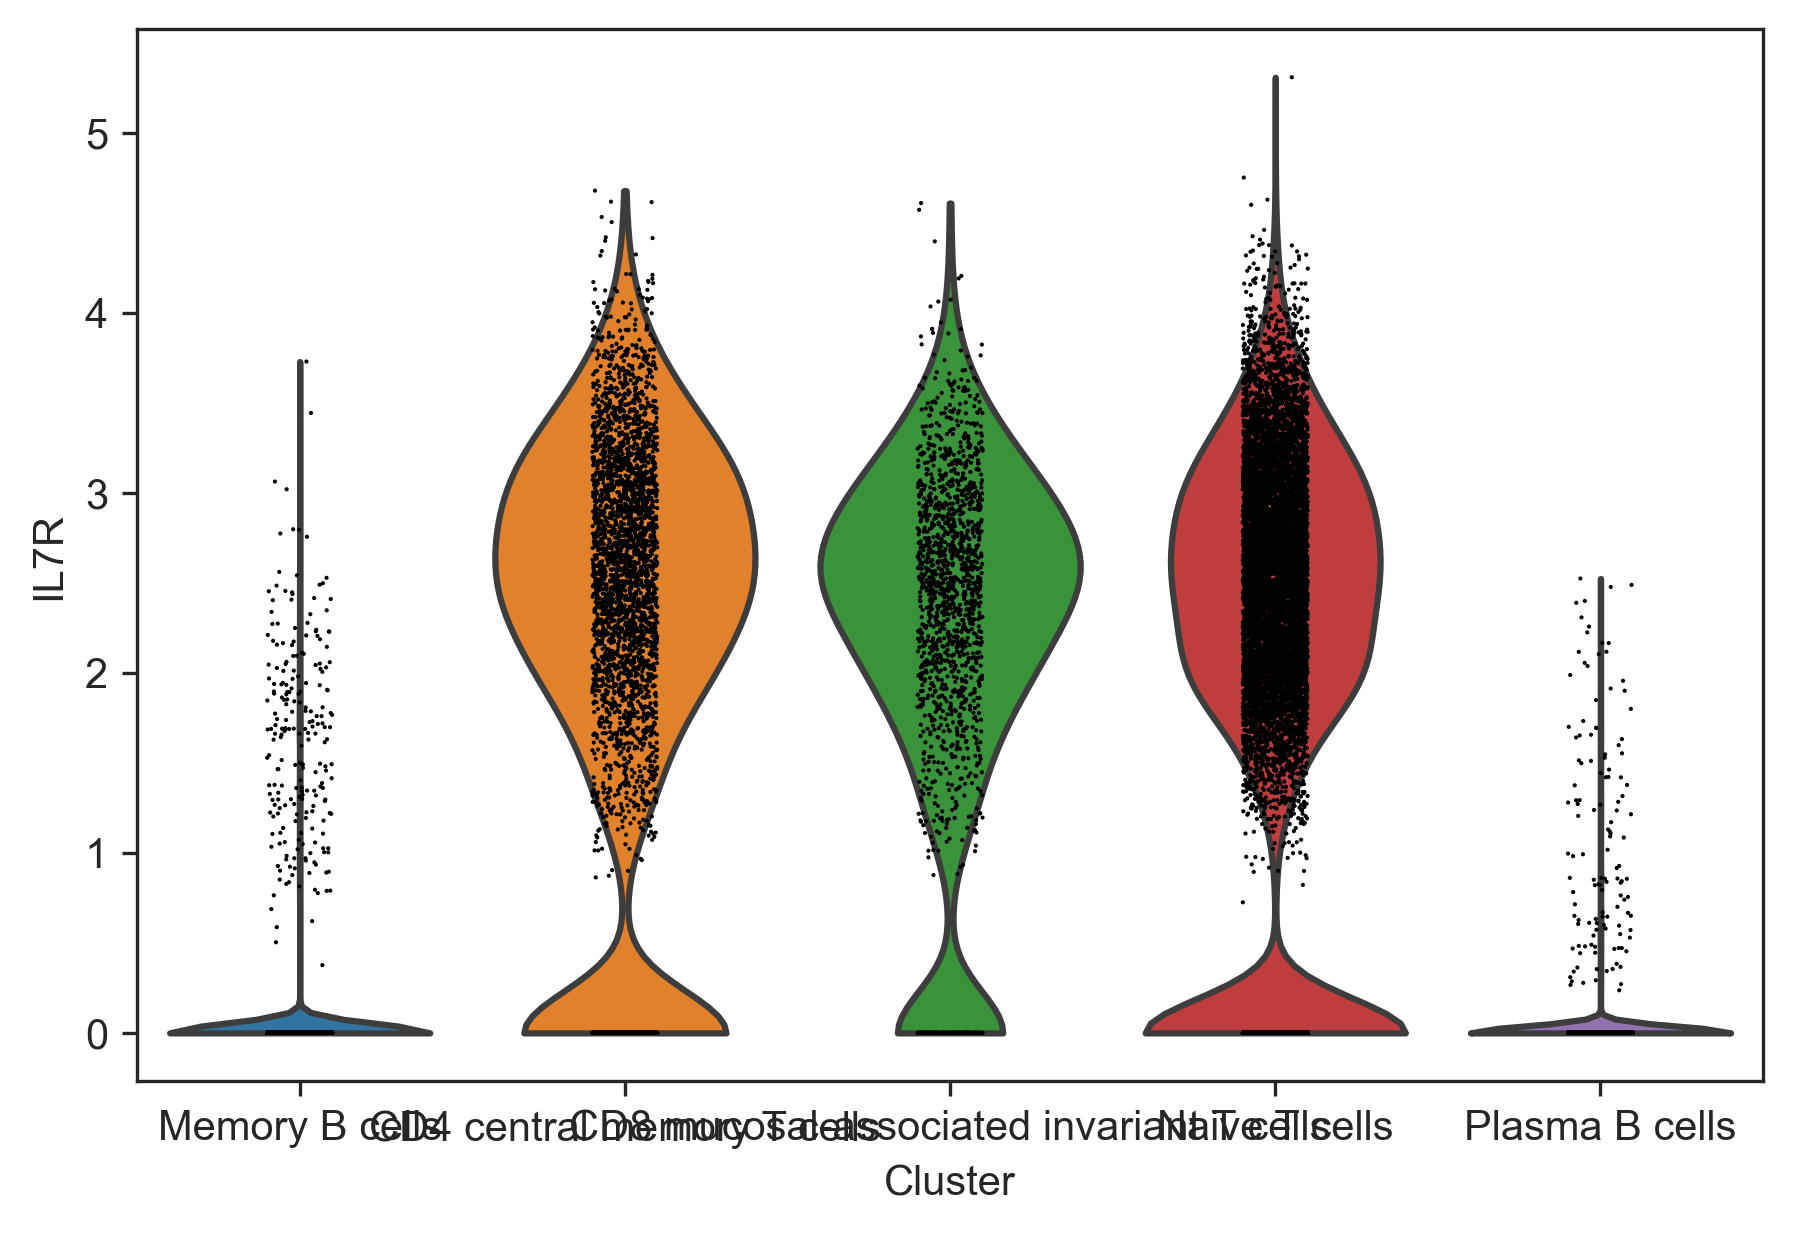

In [44]:
sc.pl.violin(adata, "IL7R", groupby="Cluster")

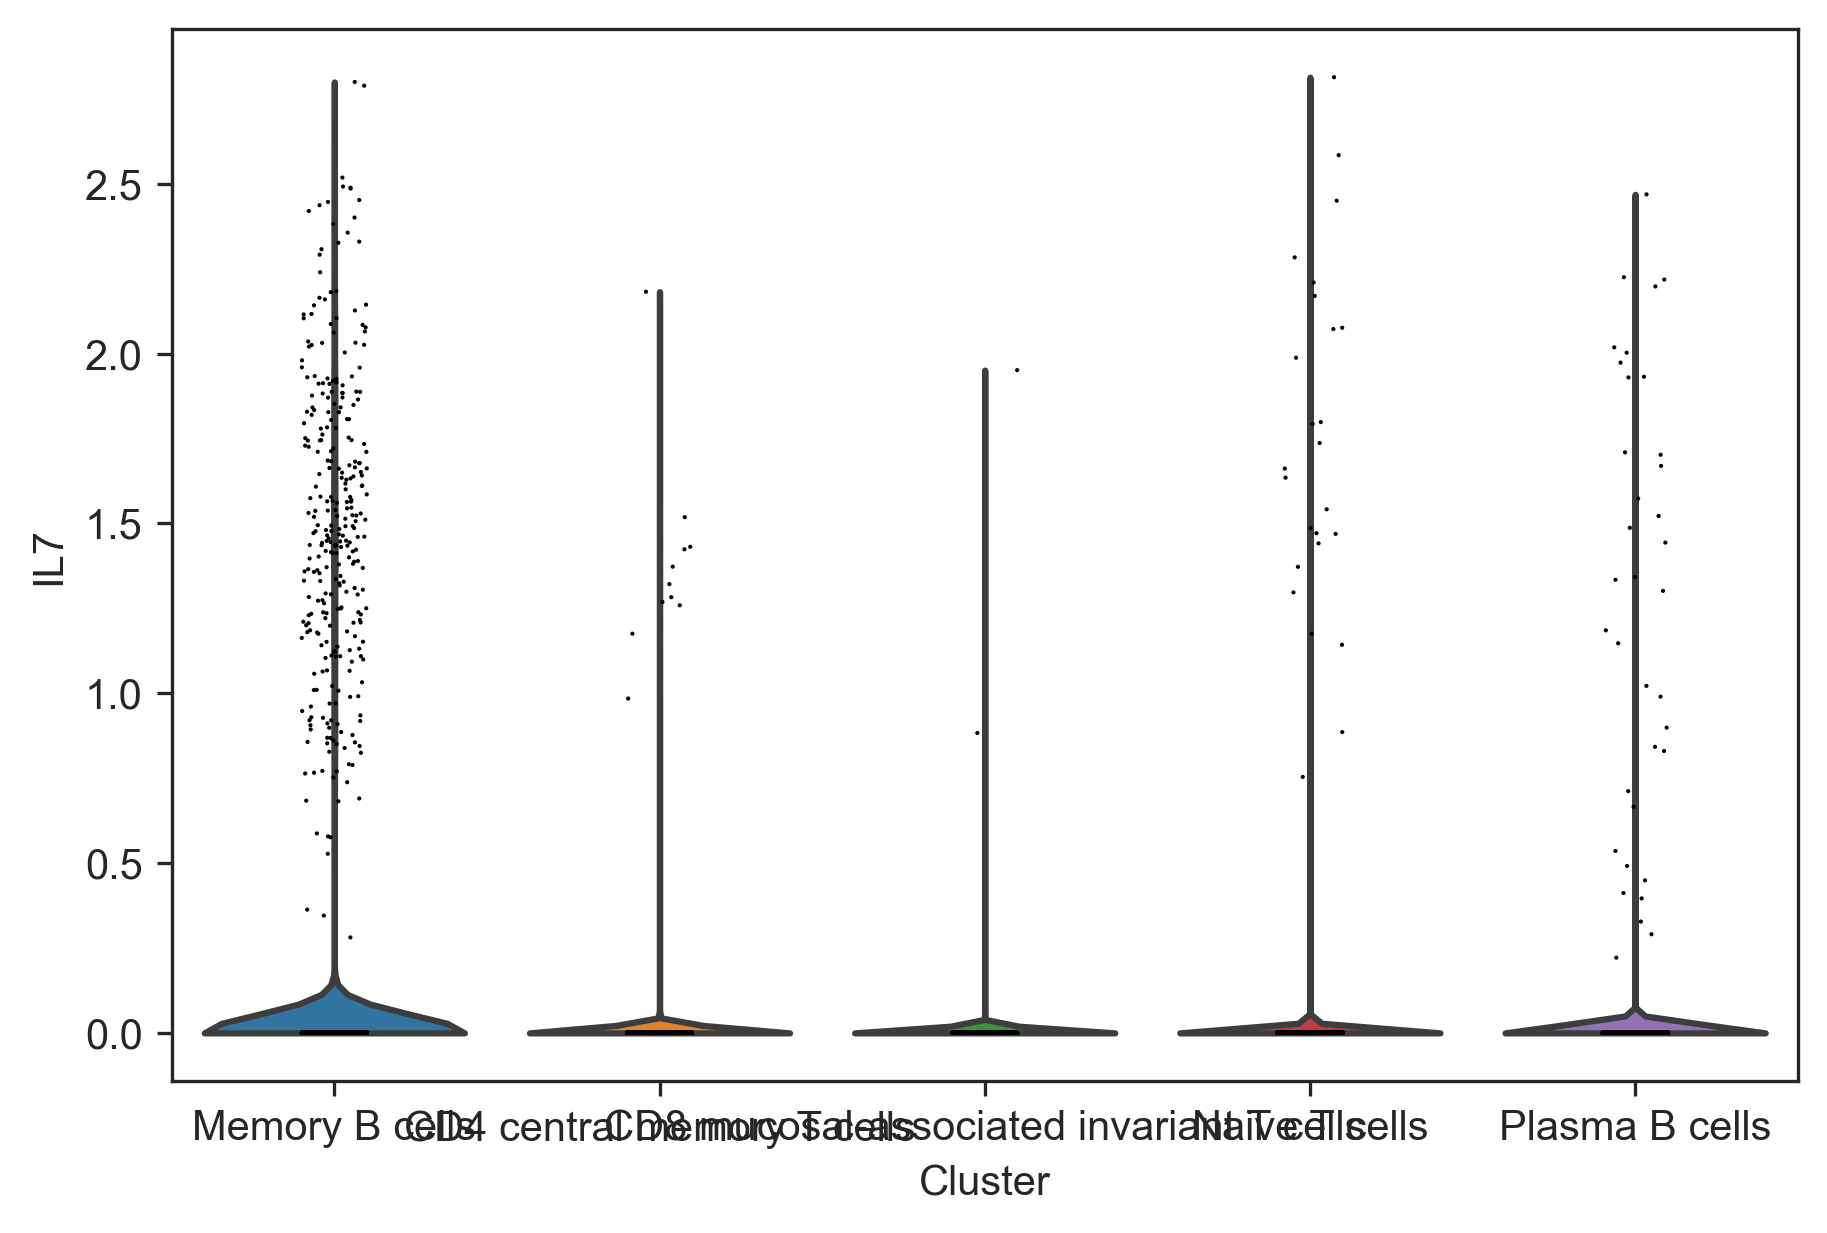

In [55]:
sc.pl.violin(adata, "IL7", groupby="Cluster")

,Sample,Patient,Origin,Tissue,Efficacy,Group,Treatment,Number of counts,Number of genes,Major celltype,...,mcp_1,mcp_2,mcp_3,mcp_4,mcp_5,mcp_6,mcp_7,mcp_8,mcp_9,Case details
Cell barcode,,,,,,,,,,,,,,,,,,,,,
AAATGCCTCATCTGCC.Pre_P007_t,Pre_P007_t,P007,t,lymph_node,Partial response,Pre-treatment,Anti-PD-L1+Chemo,1068.0,513.0,B cell,...,-3.563724,0.371048,-1.619143,-1.813381,-1.940149,0.014317,-2.136217,-0.683221,-0.847733,"Partial response, Anti-PD-L1+Chemo"
AATCCAGAGCGTTCCG.Pre_P007_t,Pre_P007_t,P007,t,lymph_node,Partial response,Pre-treatment,Anti-PD-L1+Chemo,1309.0,545.0,B cell,...,-3.127459,1.686629,-0.994259,0.198733,-4.189587,1.429951,-2.414752,0.321542,-2.325573,"Partial response, Anti-PD-L1+Chemo"
ACAGCCGAGCACCGCT.Pre_P007_t,Pre_P007_t,P007,t,lymph_node,Partial response,Pre-treatment,Anti-PD-L1+Chemo,1344.0,499.0,B cell,...,3.349839,-6.774609,0.869669,-0.504771,0.049517,7.181855,1.634877,1.491496,0.019115,"Partial response, Anti-PD-L1+Chemo"
ACCGTAAAGCTAACTC.Pre_P007_t,Pre_P007_t,P007,t,lymph_node,Partial response,Pre-treatment,Anti-PD-L1+Chemo,992.0,560.0,B cell,...,-3.962531,2.311858,3.899030,1.660699,-4.441852,4.524186,-0.961809,1.442746,-5.891182,"Partial response, Anti-PD-L1+Chemo"
ACGAGCCTCGTAGGTT.Pre_P007_t,Pre_P007_t,P007,t,lymph_node,Partial response,Pre-treatment,Anti-PD-L1+Chemo,1482.0,715.0,B cell,...,-4.340060,-0.904557,-1.775599,-0.648505,-2.100330,-0.467920,-3.197711,0.059418,0.961251,"Partial response, Anti-PD-L1+Chemo"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CGGGTCAGTTCCCGAG.Pre_P004_t,Pre_P004_t,P004,t,chest_wall,Stable disease,Pre-treatment,Anti-PD-L1+Chemo,1530.0,455.0,B cell,...,4.325658,-3.115630,-0.334752,10.073674,-4.009384,9.087369,3.381884,9.725148,0.089741,"Stable disease, Anti-PD-L1+Chemo"
GCTTGAACAGGCTGAA.Pre_P004_t,Pre_P004_t,P004,t,chest_wall,Stable disease,Pre-treatment,Anti-PD-L1+Chemo,15601.0,1716.0,B cell,...,0.124471,-1.045384,-0.956516,3.009219,1.230553,-2.518678,0.665897,3.943215,-1.035215,"Stable disease, Anti-PD-L1+Chemo"
GTCGGGTGTCCGAATT.Pre_P004_t,Pre_P004_t,P004,t,chest_wall,Stable disease,Pre-treatment,Anti-PD-L1+Chemo,23259.0,1702.0,B cell,...,5.658261,-2.261568,2.829023,7.227211,1.130367,4.101193,3.216111,5.542288,-3.909803,"Stable disease, Anti-PD-L1+Chemo"


In [78]:
#adata = sc.datasets.pbmc68k_reduced()
#adata = adata[adata.obs.Cluster.isin(['0','1'])].copy()
df = sc.get.obs_df(adata_raw, ['IL7', 'IL7R', 'Cluster','Efficacy'])
df['Cluster'] = df['Cluster'].replace('CD8 mucosal-associated invariant T cells', 'MAIT cells')

#df = df.set_index('Cluster').stack().reset_index()
#df.columns = ['Cluster', 'gene', 'value']
violin = sns.violinplot(data=df, x='Cluster', y='IL7', hue="Efficacy",
                split=True, inner="quart", linewidth=1)
strip = sns.stripplot(x="Cluster", y="IL7", hue="Efficacy", data=df, jitter=True, dodge=True, color="black", size=2)
plt.xticks(rotation=45)

legend_elements = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=violin.get_facecolor()[0], markersize=10, label='Partial response'),
                   plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=violin.get_facecolor()[1], markersize=10, label='Stable disease')]

# Add the custom legend to the plot
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.2, 0.7))
plt.tight_layout()
#plt.legend(title="Efficacy", loc="upper right", bbox_to_anchor=(1.2, 1))



Error in callback <function _draw_all_if_interactive at 0x17decf280> (for post_execute):


ValueError: Invalid RGBA argument: 1.0

ValueError: Invalid RGBA argument: 1.0

<Figure size 1920x1440 with 1 Axes>

In [79]:
adata_raw = adata.raw.to_adata()

In [68]:
adata.obs.Cluster

Cell barcode
AAATGCCTCATCTGCC.Pre_P007_t    Memory B cells
AATCCAGAGCGTTCCG.Pre_P007_t    Memory B cells
ACAGCCGAGCACCGCT.Pre_P007_t    Memory B cells
ACCGTAAAGCTAACTC.Pre_P007_t    Memory B cells
ACGAGCCTCGTAGGTT.Pre_P007_t    Memory B cells
                                    ...      
CGGGTCAGTTCCCGAG.Pre_P004_t    Plasma B cells
GCTTGAACAGGCTGAA.Pre_P004_t    Plasma B cells
GTCGGGTGTCCGAATT.Pre_P004_t    Plasma B cells
TCATTTGTCAATACCG.Pre_P004_t    Plasma B cells
TCTCATATCCAAAGTC.Pre_P004_t    Plasma B cells
Name: Cluster, Length: 29091, dtype: category
Categories (5, object): ['Memory B cells', 'CD4 central memory T cells', 'CD8 mucosal-associated invariant T cells', 'Naive T cells', 'Plasma B cells']

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Memory B cells'),
  Text(1, 0, 'CD4 central memory T cells'),
  Text(2, 0, 'MAIT cells'),
  Text(3, 0, 'Naive T cells'),
  Text(4, 0, 'Plasma B cells')])

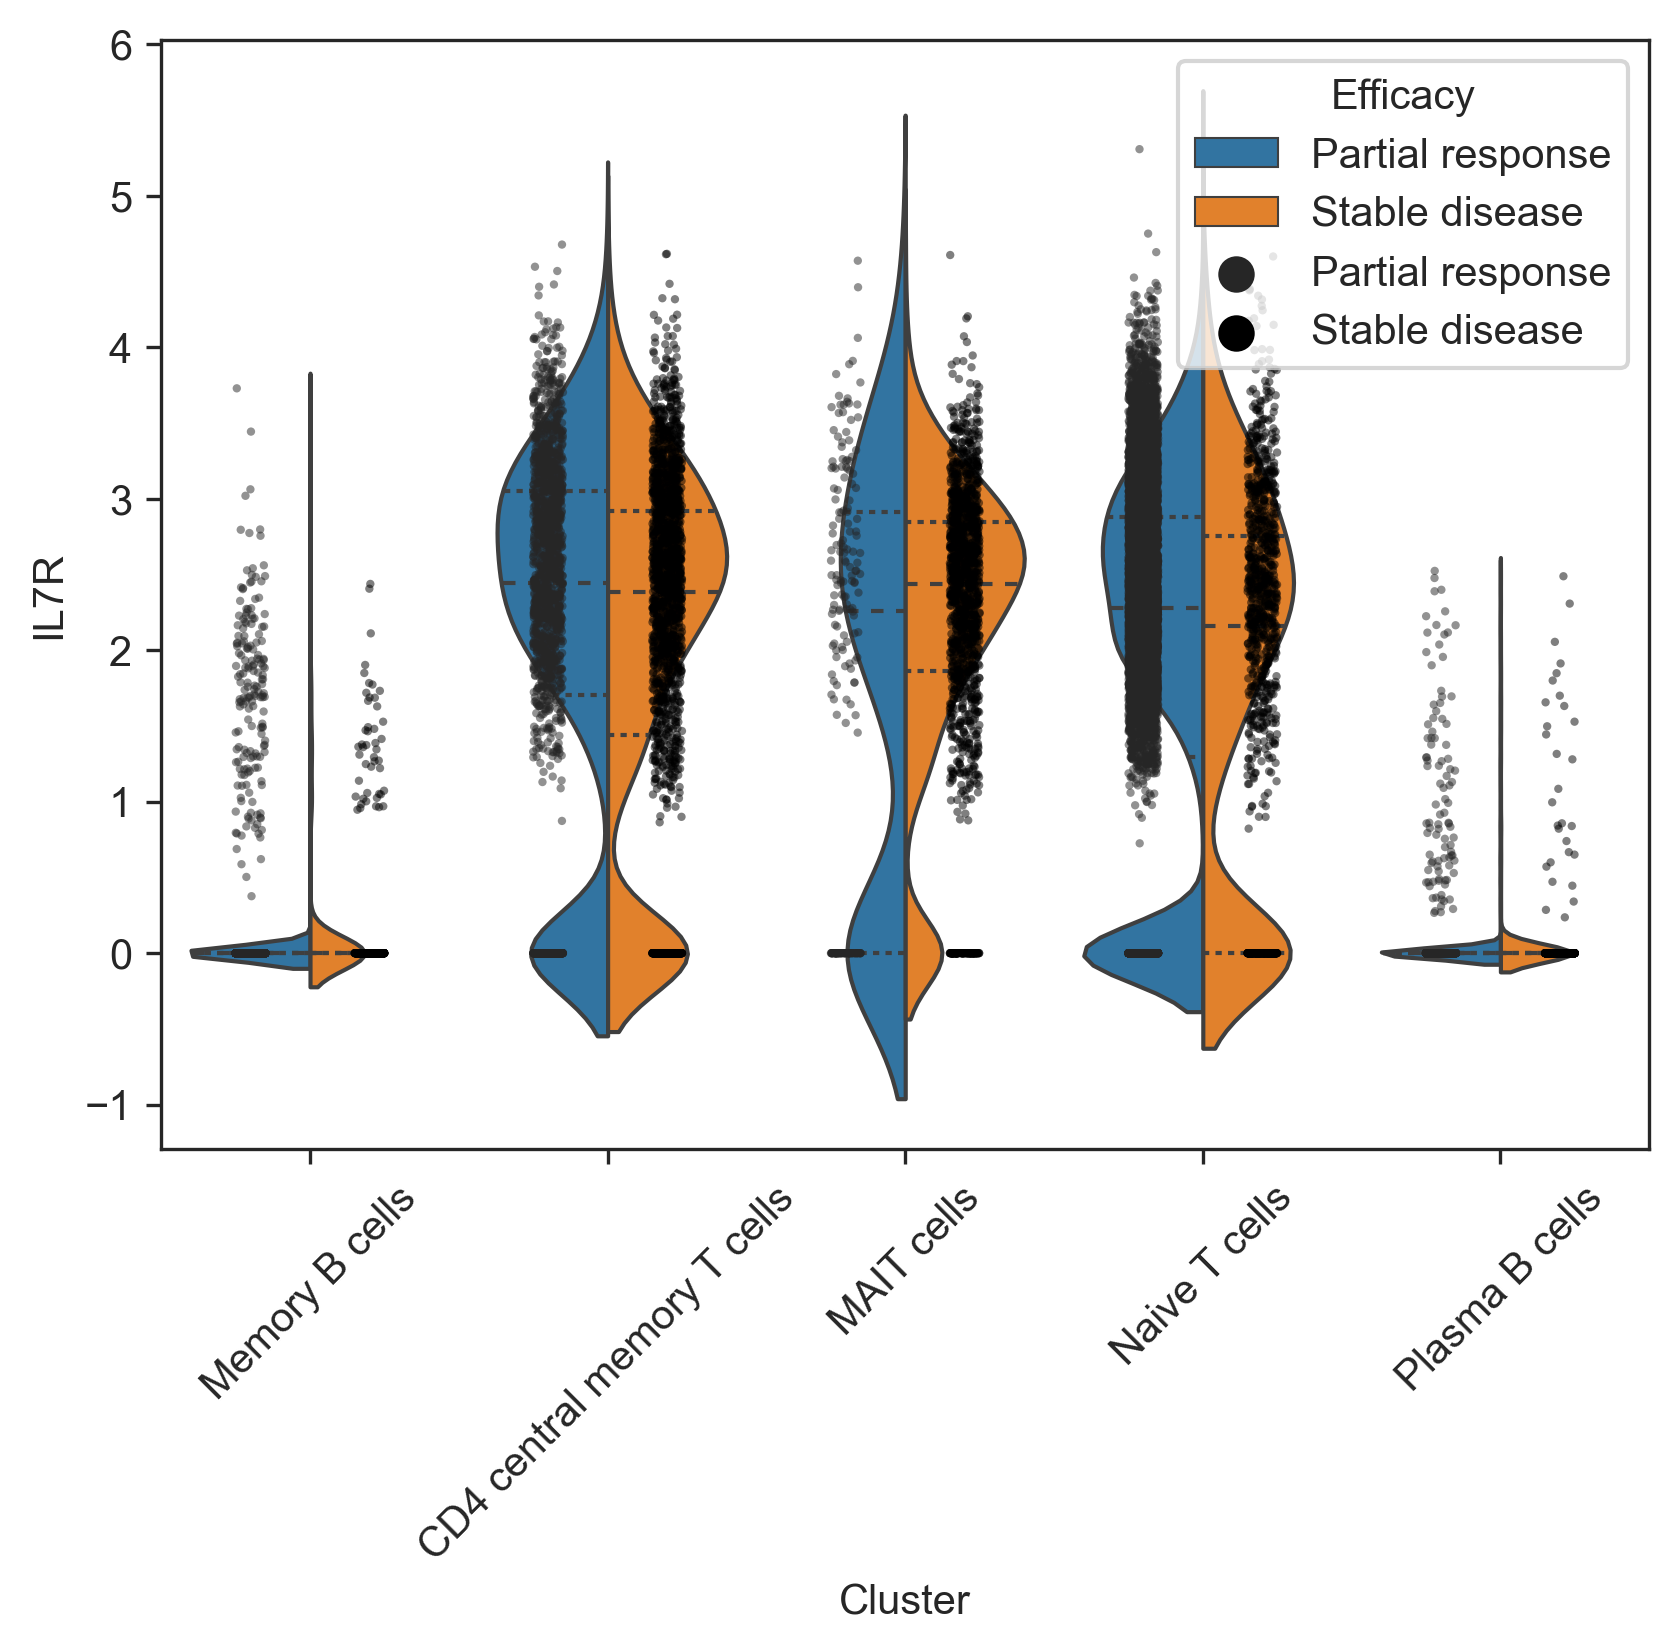

In [73]:
sns.violinplot(data=df, x='Cluster', y='IL7R', hue="Efficacy",
                split=True, inner="quart", linewidth=1)   
sns.stripplot(x="Cluster", y="IL7R", hue="Efficacy", data=df, jitter=True, dodge=True, color="black", size=2, alpha=0.5)
plt.xticks(rotation=45)

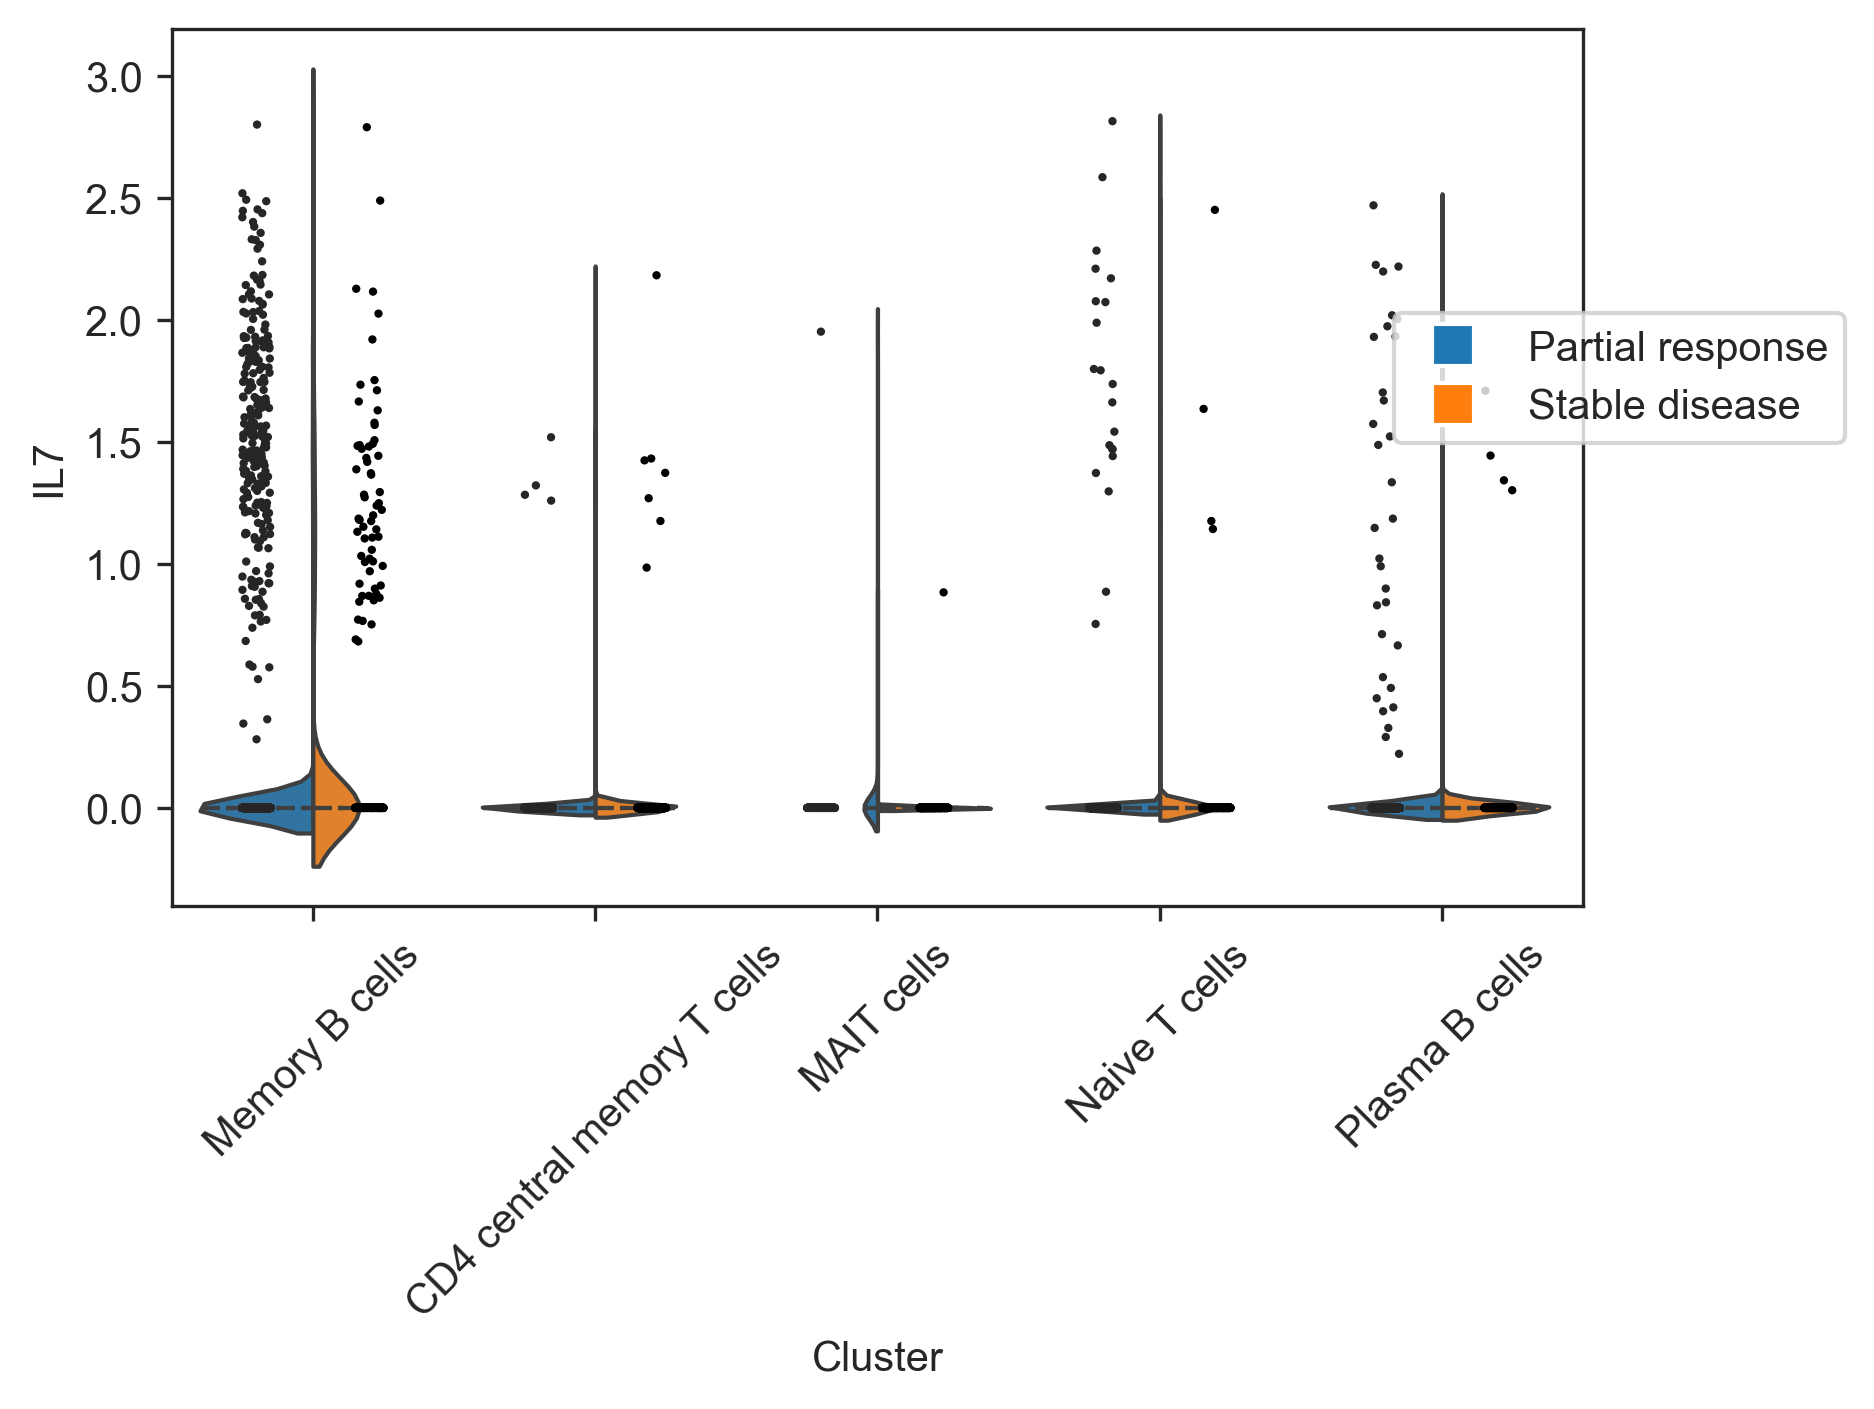

In [110]:

# Create the violin and strip plot
violin = sns.violinplot(data=df, x='Cluster', y='IL7', hue="Efficacy",
                        split=True, inner="quart", linewidth=1)
strip = sns.stripplot(x="Cluster", y="IL7", hue="Efficacy", data=df,
                      jitter=True, dodge=True, color="black", size=2)
plt.xticks(rotation=45)

# Get the colors of the violin plot
colors = violin.collections[::2][0].get_facecolor()

# Create custom legend for the violin plot
legend_elements = [plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=blue_rgba, markersize=10, label='Partial response'),
                   plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=orange_rgba, markersize=10, label='Stable disease')]

# Add the custom legend to the plot
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.2, 0.7))

plt.tight_layout()  # Adjust layout to prevent clipping of the legend
plt.savefig("output/IL7_violin_split.pdf")
plt.savefig("output/IL7_violin_split.png")


In [101]:
default_palette = sns.color_palette()

# Extract blue and orange colors
blue_color = default_palette[0]
orange_color = default_palette[1]

# Convert colors to RGBA format
blue_rgba = (*blue_color, 1)  # 1 for the alpha channel
orange_rgba = (*orange_color, 1)

In [95]:
violin.collections[::2][0].get_facecolor()

array([[0.19460784, 0.45343137, 0.63284314, 1.        ]])

In [96]:
default_palette

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

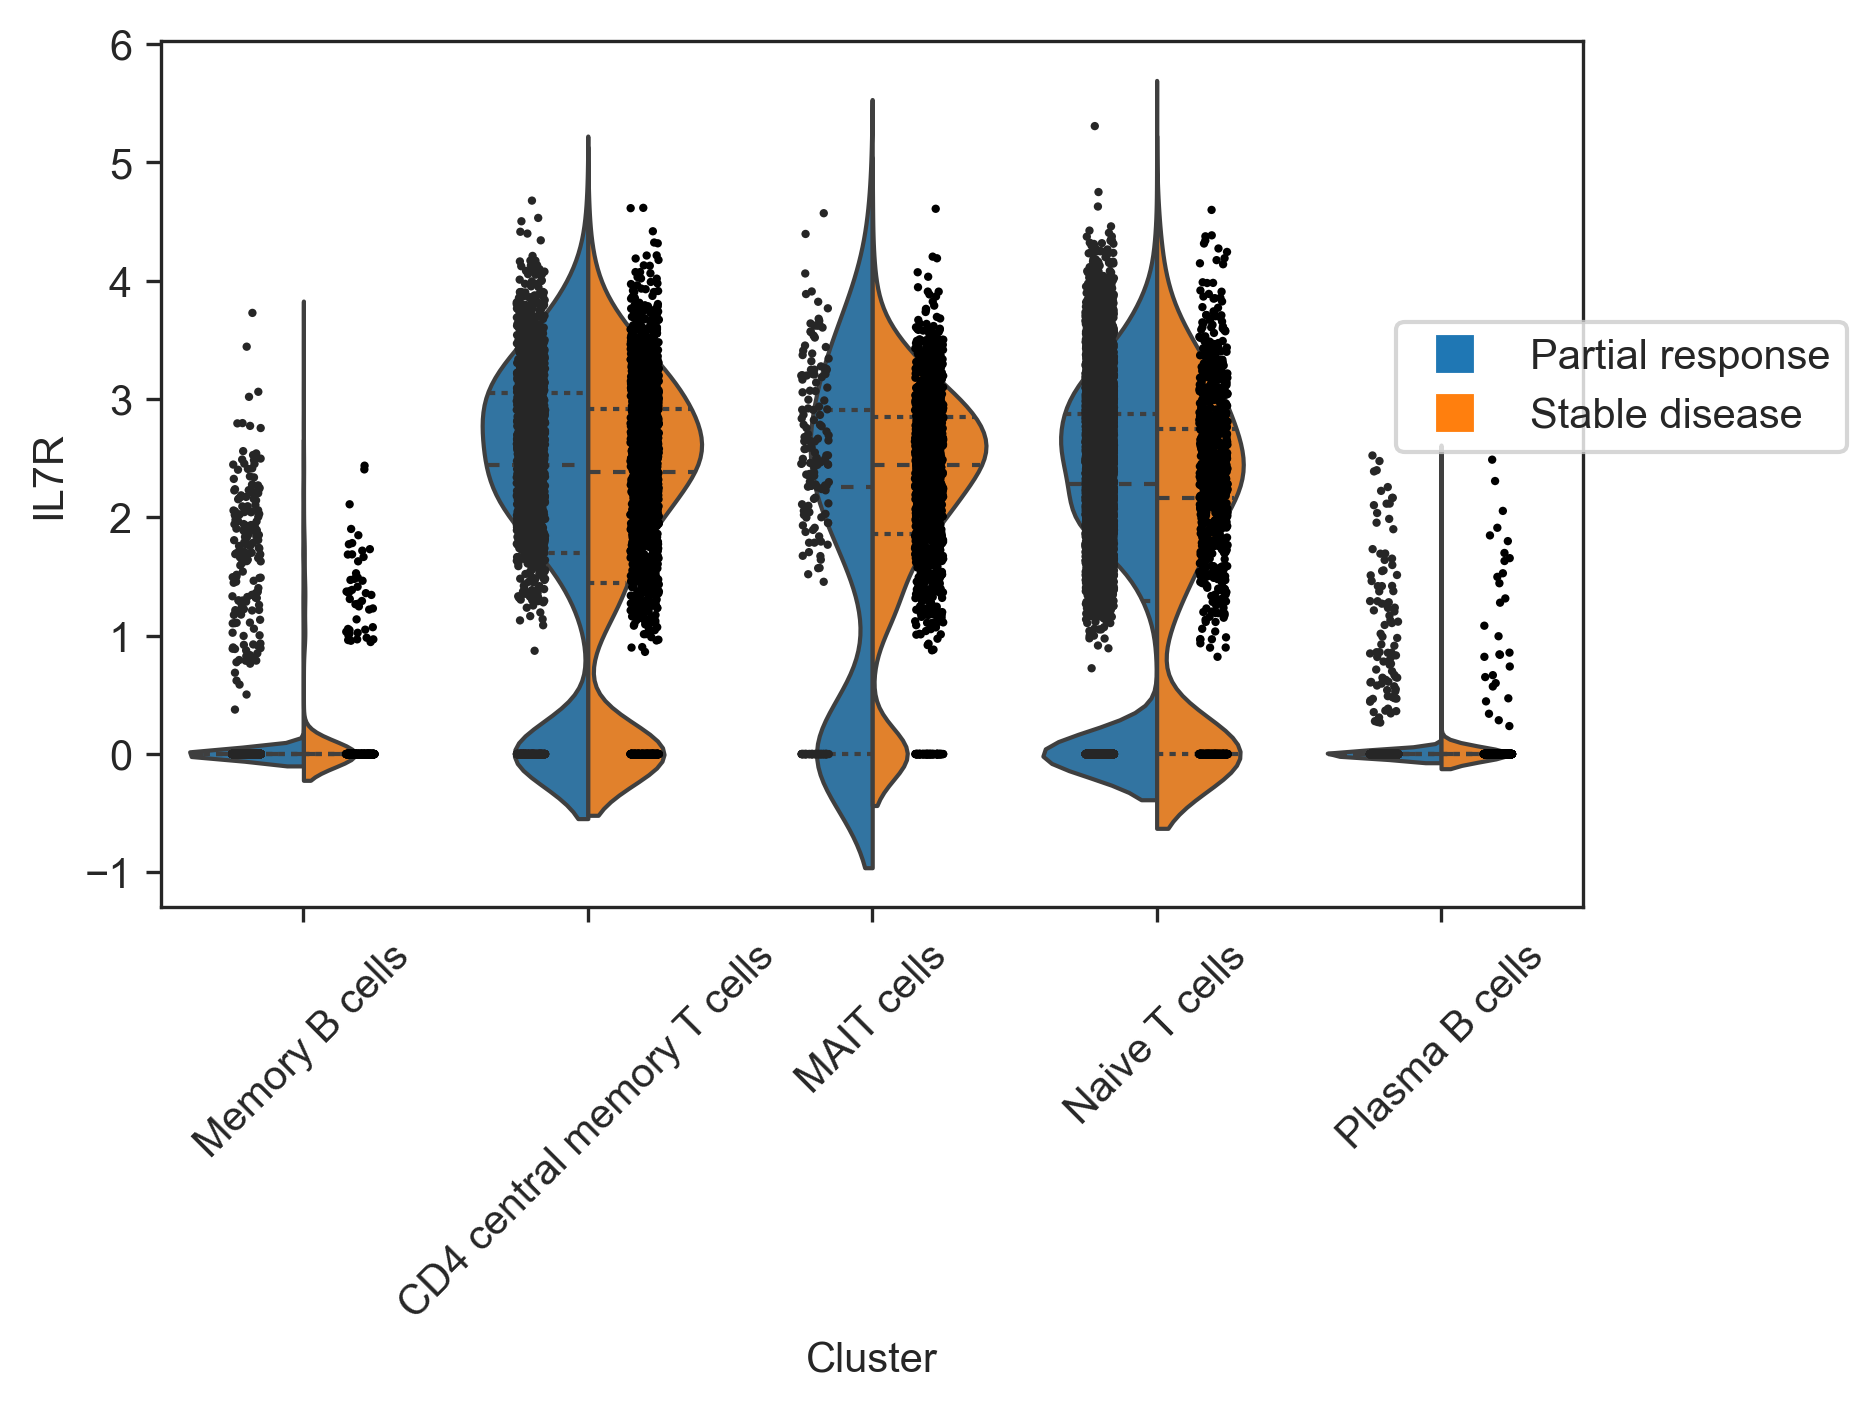

In [109]:

# Create the violin and strip plot
violin = sns.violinplot(data=df, x='Cluster', y='IL7R', hue="Efficacy",
                        split=True, inner="quart", linewidth=1)
strip = sns.stripplot(x="Cluster", y="IL7R", hue="Efficacy", data=df,
                      jitter=True, dodge=True, color="black", size=2)
plt.xticks(rotation=45)

# Get the colors of the violin plot
colors = violin.collections[::2][0].get_facecolor()

# Create custom legend for the violin plot
legend_elements = [plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=blue_rgba, markersize=10, label='Partial response'),
                   plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=orange_rgba, markersize=10, label='Stable disease')]

# Add the custom legend to the plot
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.2, 0.7))

plt.tight_layout()  # Adjust layout to prevent clipping of the legend
plt.savefig("output/IL7R_violin_split.pdf")
plt.savefig("output/IL7R_violin_split.png")


In [113]:
# check equal subsampling?? This should be higher in the non-responders, not the responders 

ct_subs['ct_subs_method2']['t_Bmem-CD27']

AnnData object with n_obs × n_vars = 7283 × 22173
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9', 'extrema'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [171]:
from scperturb import equal_subsampling

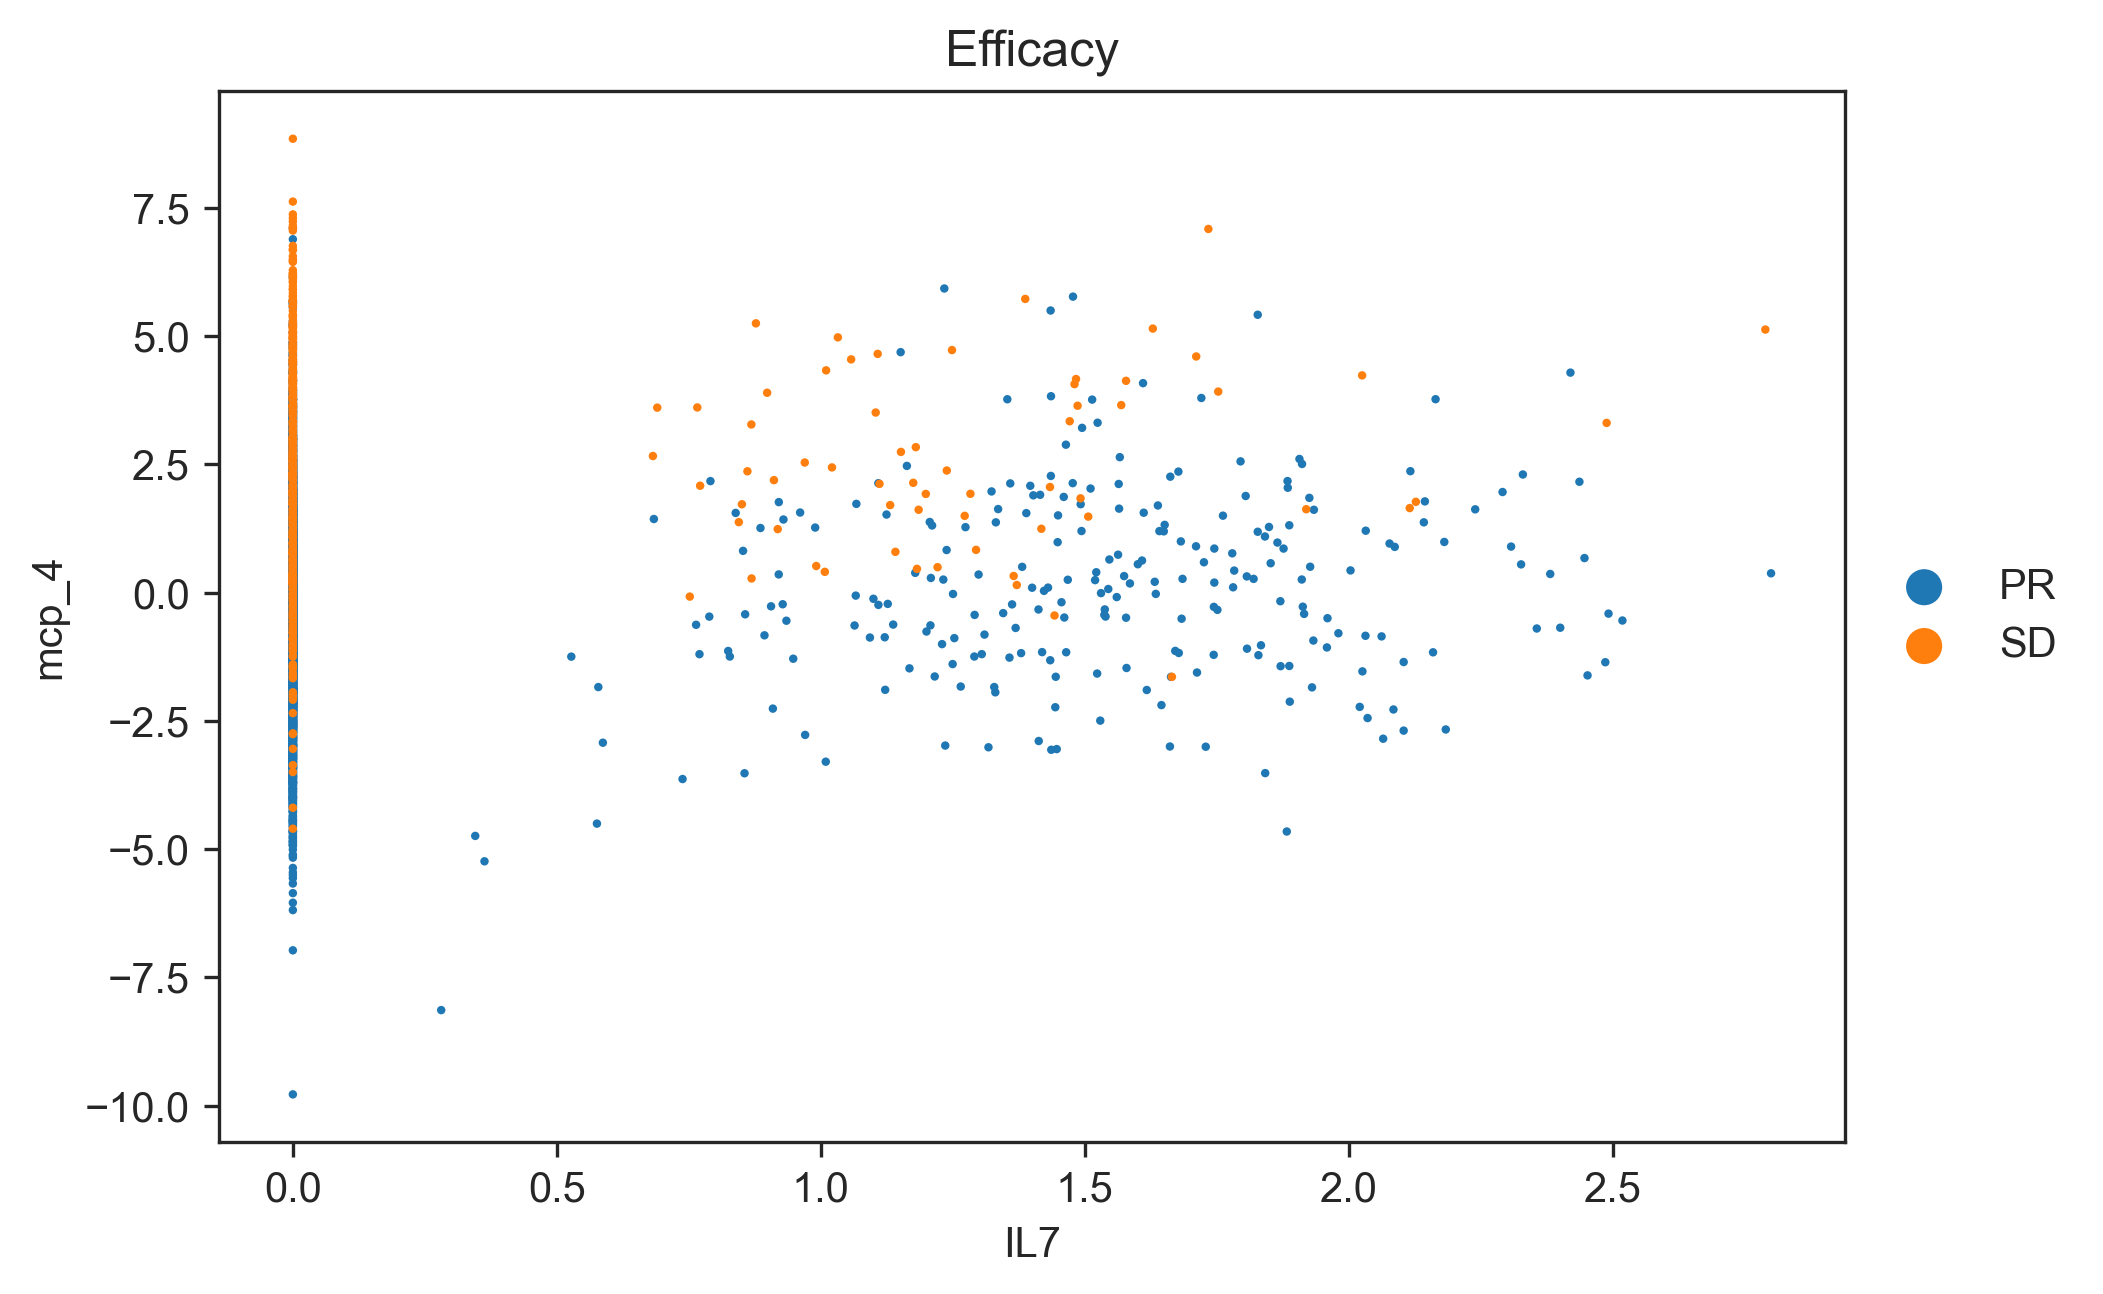

In [169]:
sc.pl.scatter(ct_subs['ct_subs_method2']['t_Bmem-CD27'], x="IL7", y="mcp_4", color="Efficacy")

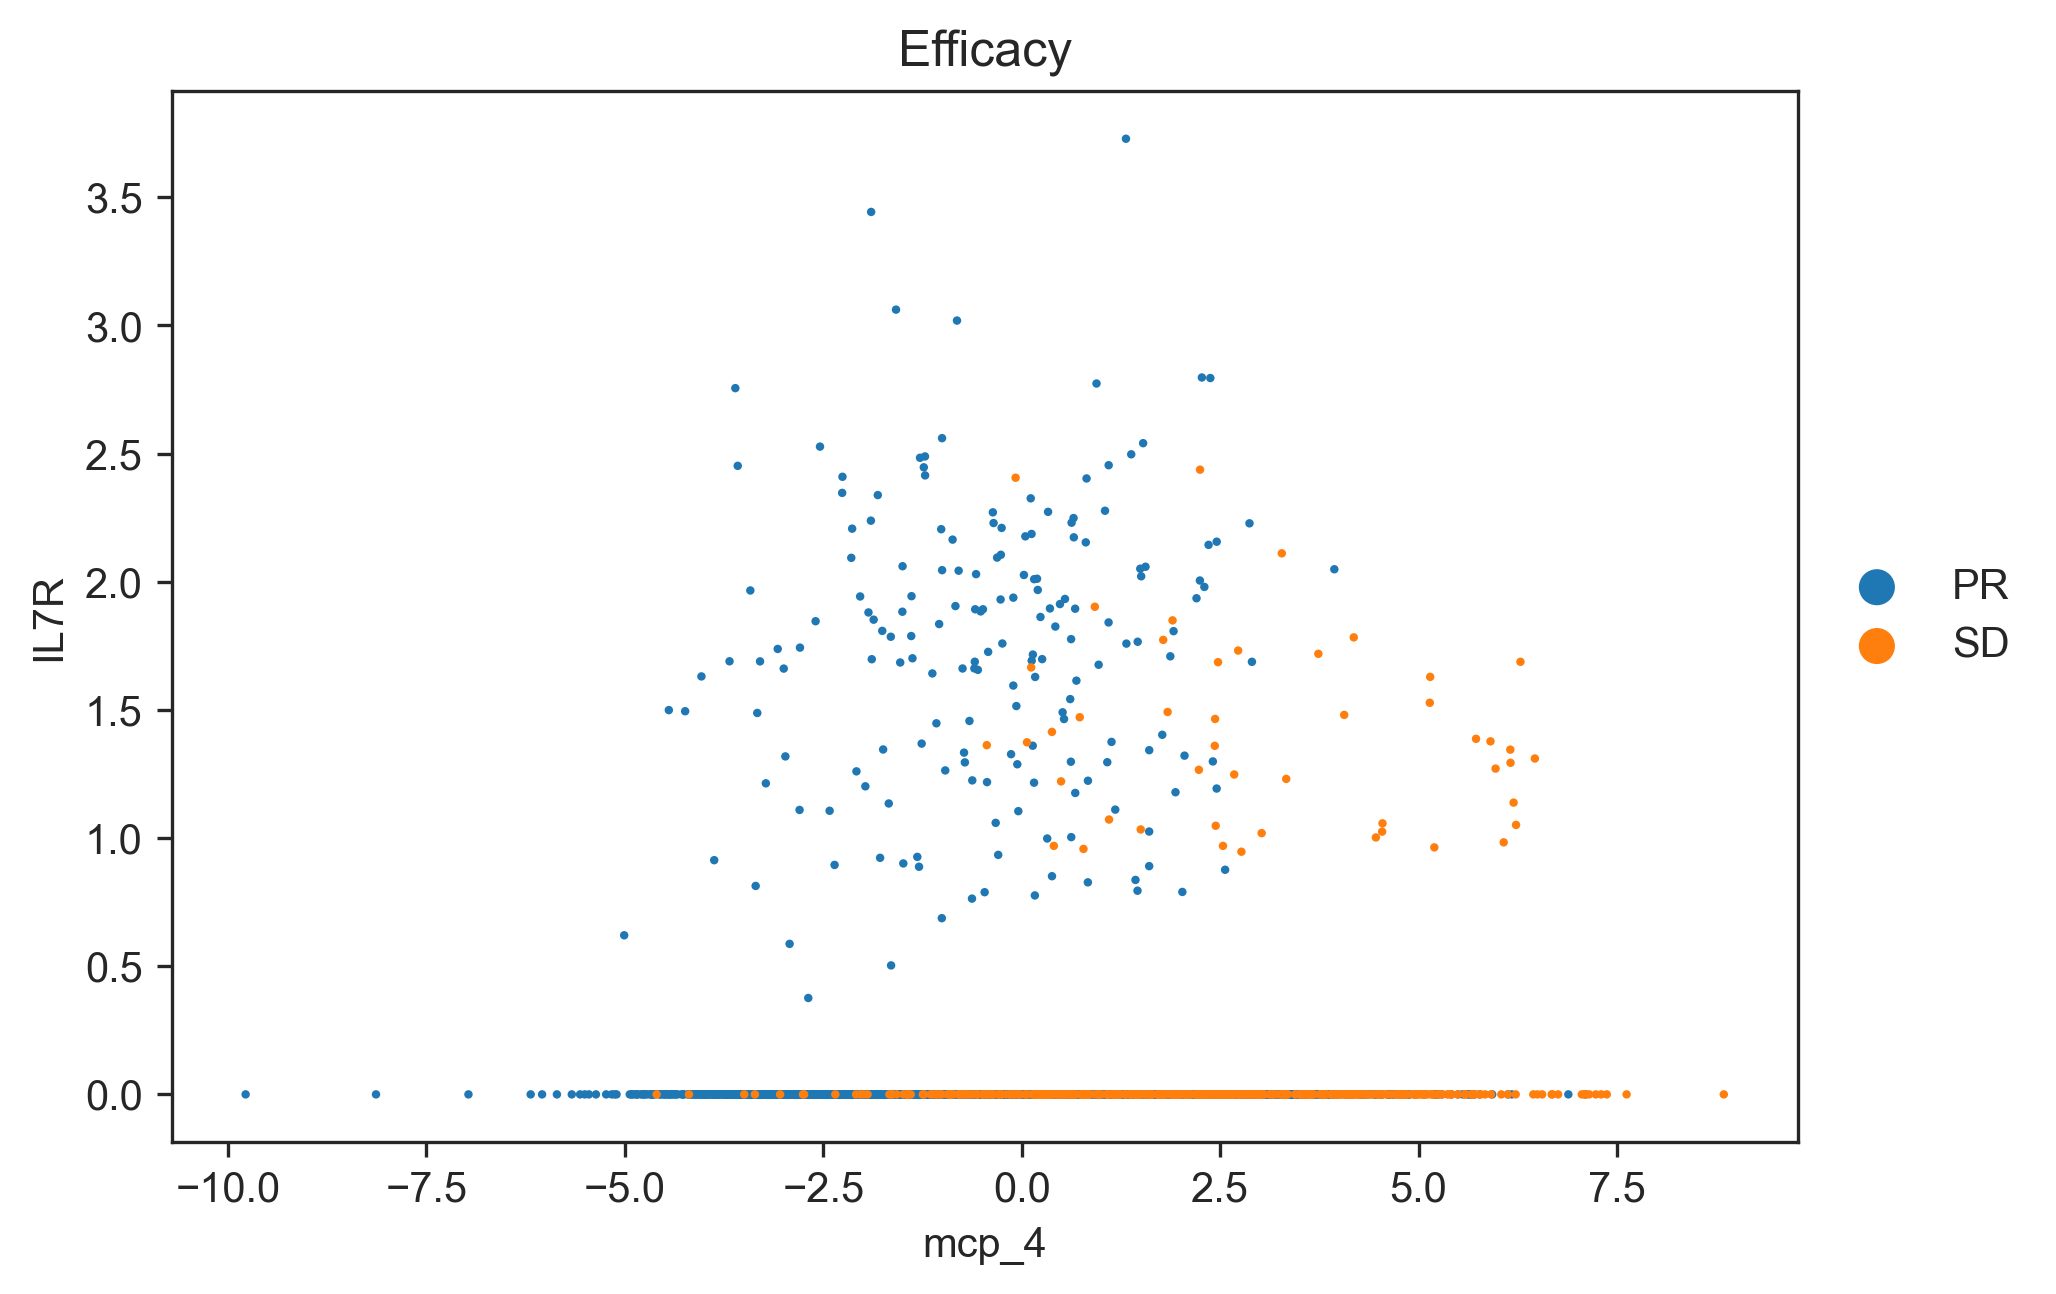

In [120]:
sc.pl.scatter(
ct_subs['ct_subs_method2']['t_Bmem-CD27'], x="mcp_4", y="IL7R", color="Efficacy")

In [146]:
x = list(ct_subs['ct_subs_method2']['t_Bmem-CD27'].obs['mcp_4'])
y= ct_subs['ct_subs_method2']['t_Bmem-CD27'][:,"IL7"].X.todense().flatten()
mini = ct_subs['ct_subs_method2']['t_Bmem-CD27'][ct_subs['ct_subs_method2']['t_Bmem-CD27'].obs['extrema']!="no"]

In [163]:
mini = mini.raw.to_adata()

df = sc.get.obs_df(mini, ['IL7', 'IL7R', 'Cluster','Efficacy'])
df['Cluster'] = df['Cluster'].replace('CD8 mucosal-associated invariant T cells', 'MAIT cells')


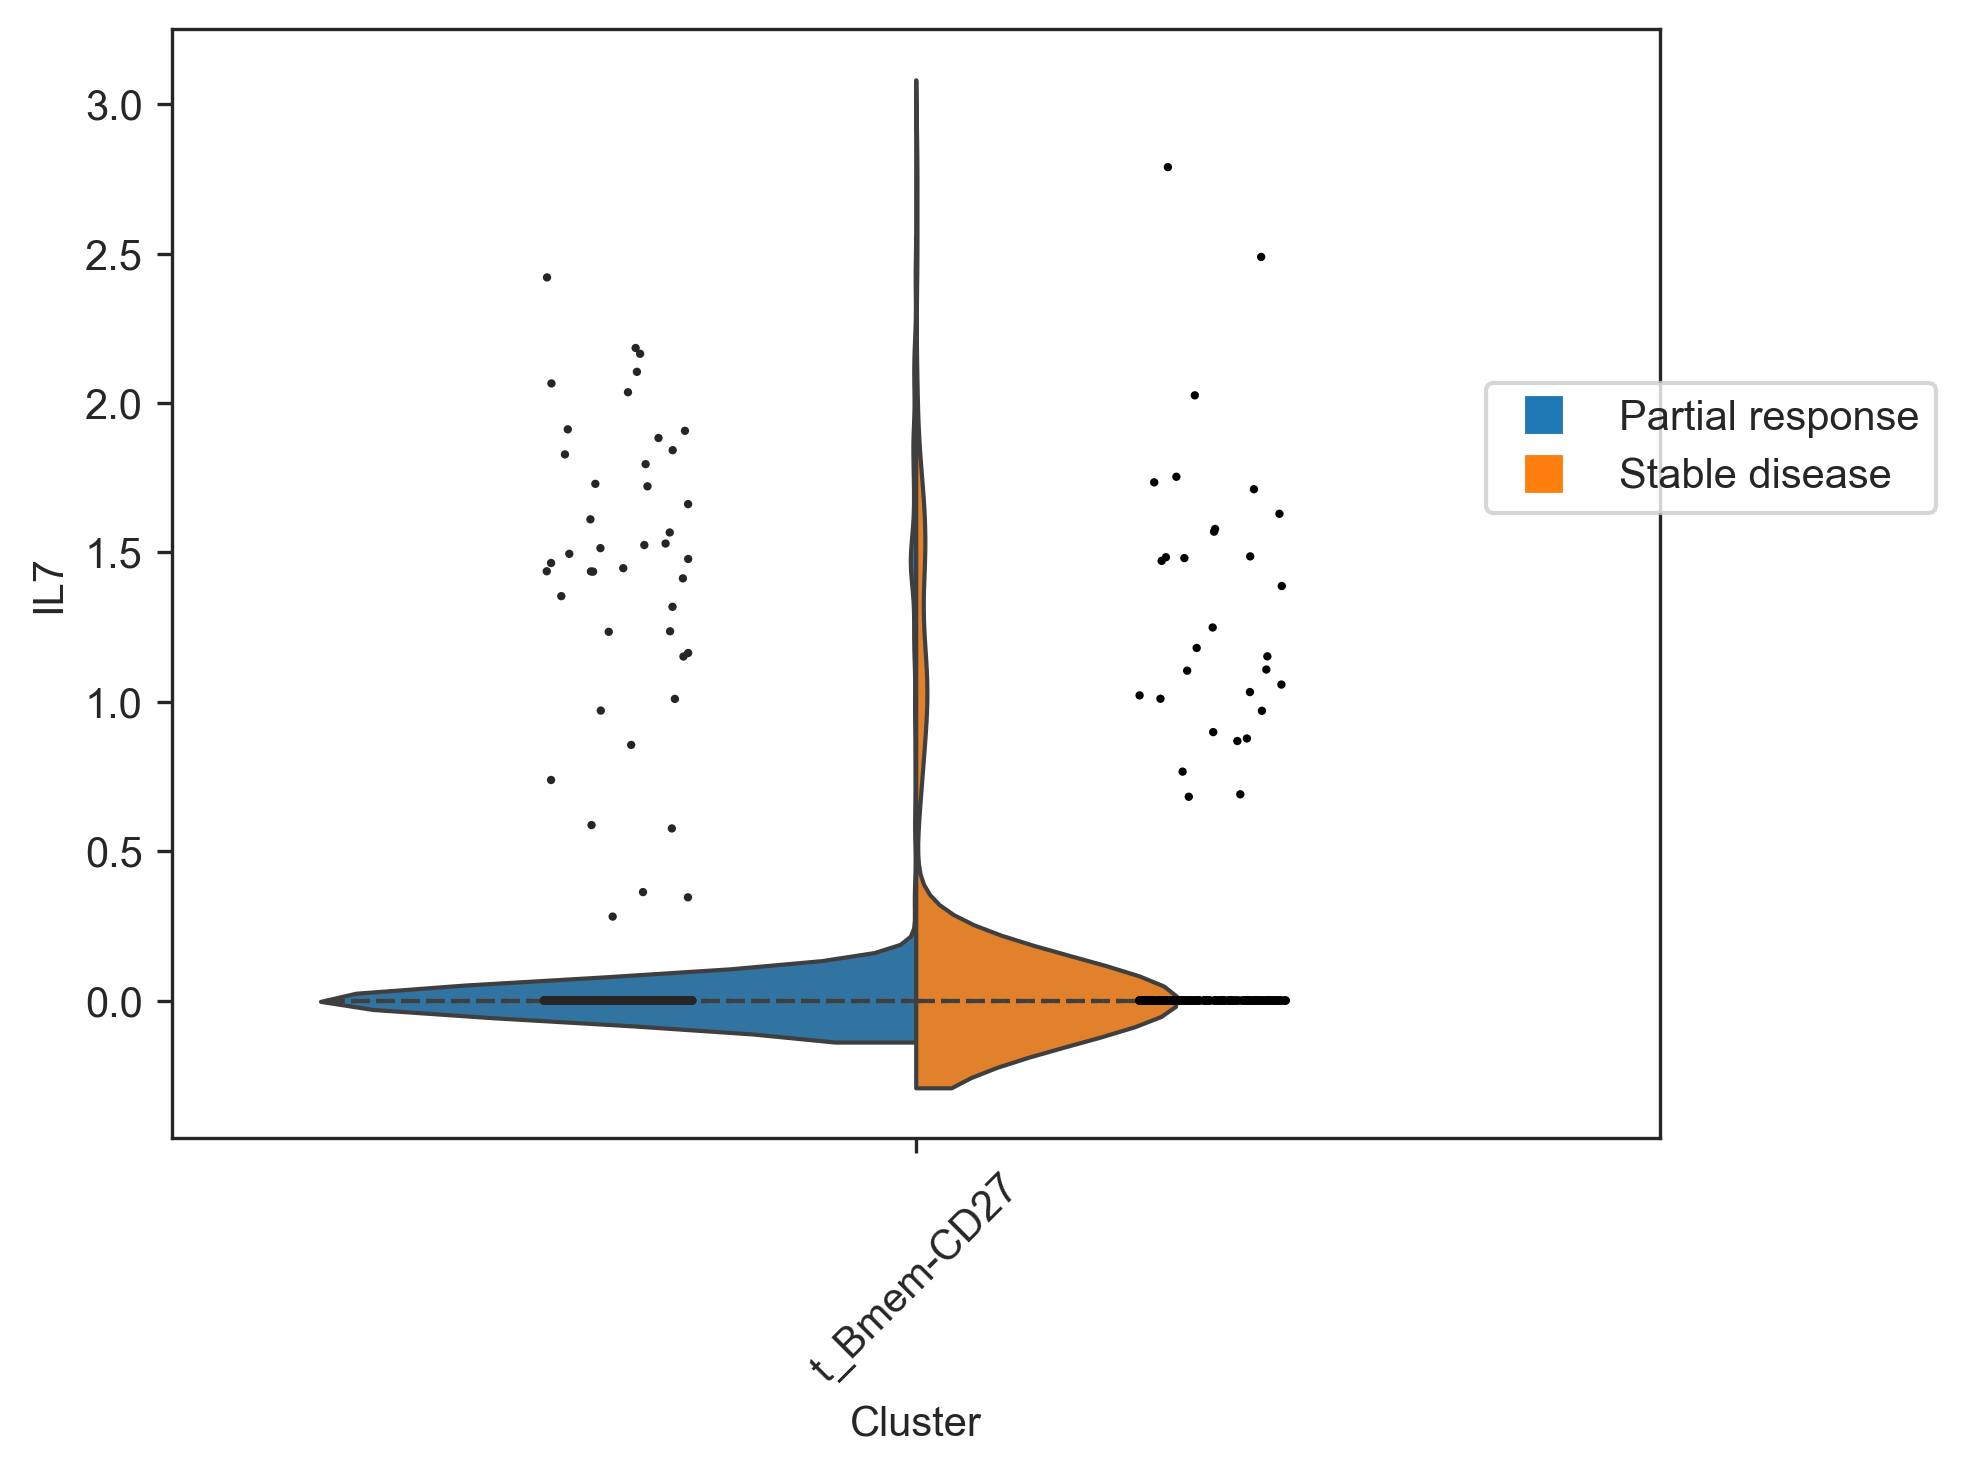

In [164]:
# Create the violin and strip plot
violin = sns.violinplot(data=df, x='Cluster', y='IL7', hue="Efficacy",
                        split=True, inner="quart", linewidth=1)
strip = sns.stripplot(x="Cluster", y="IL7", hue="Efficacy", data=df,
                      jitter=True, dodge=True, color="black", size=2)
plt.xticks(rotation=45)

# Get the colors of the violin plot
colors = violin.collections[::2][0].get_facecolor()

# Create custom legend for the violin plot
legend_elements = [plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=blue_rgba, markersize=10, label='Partial response'),
                   plt.Line2D([0], [0], marker='s', color='white', markerfacecolor=orange_rgba, markersize=10, label='Stable disease')]

# Add the custom legend to the plot
plt.legend(handles=legend_elements, loc="upper right", bbox_to_anchor=(1.2, 0.7))

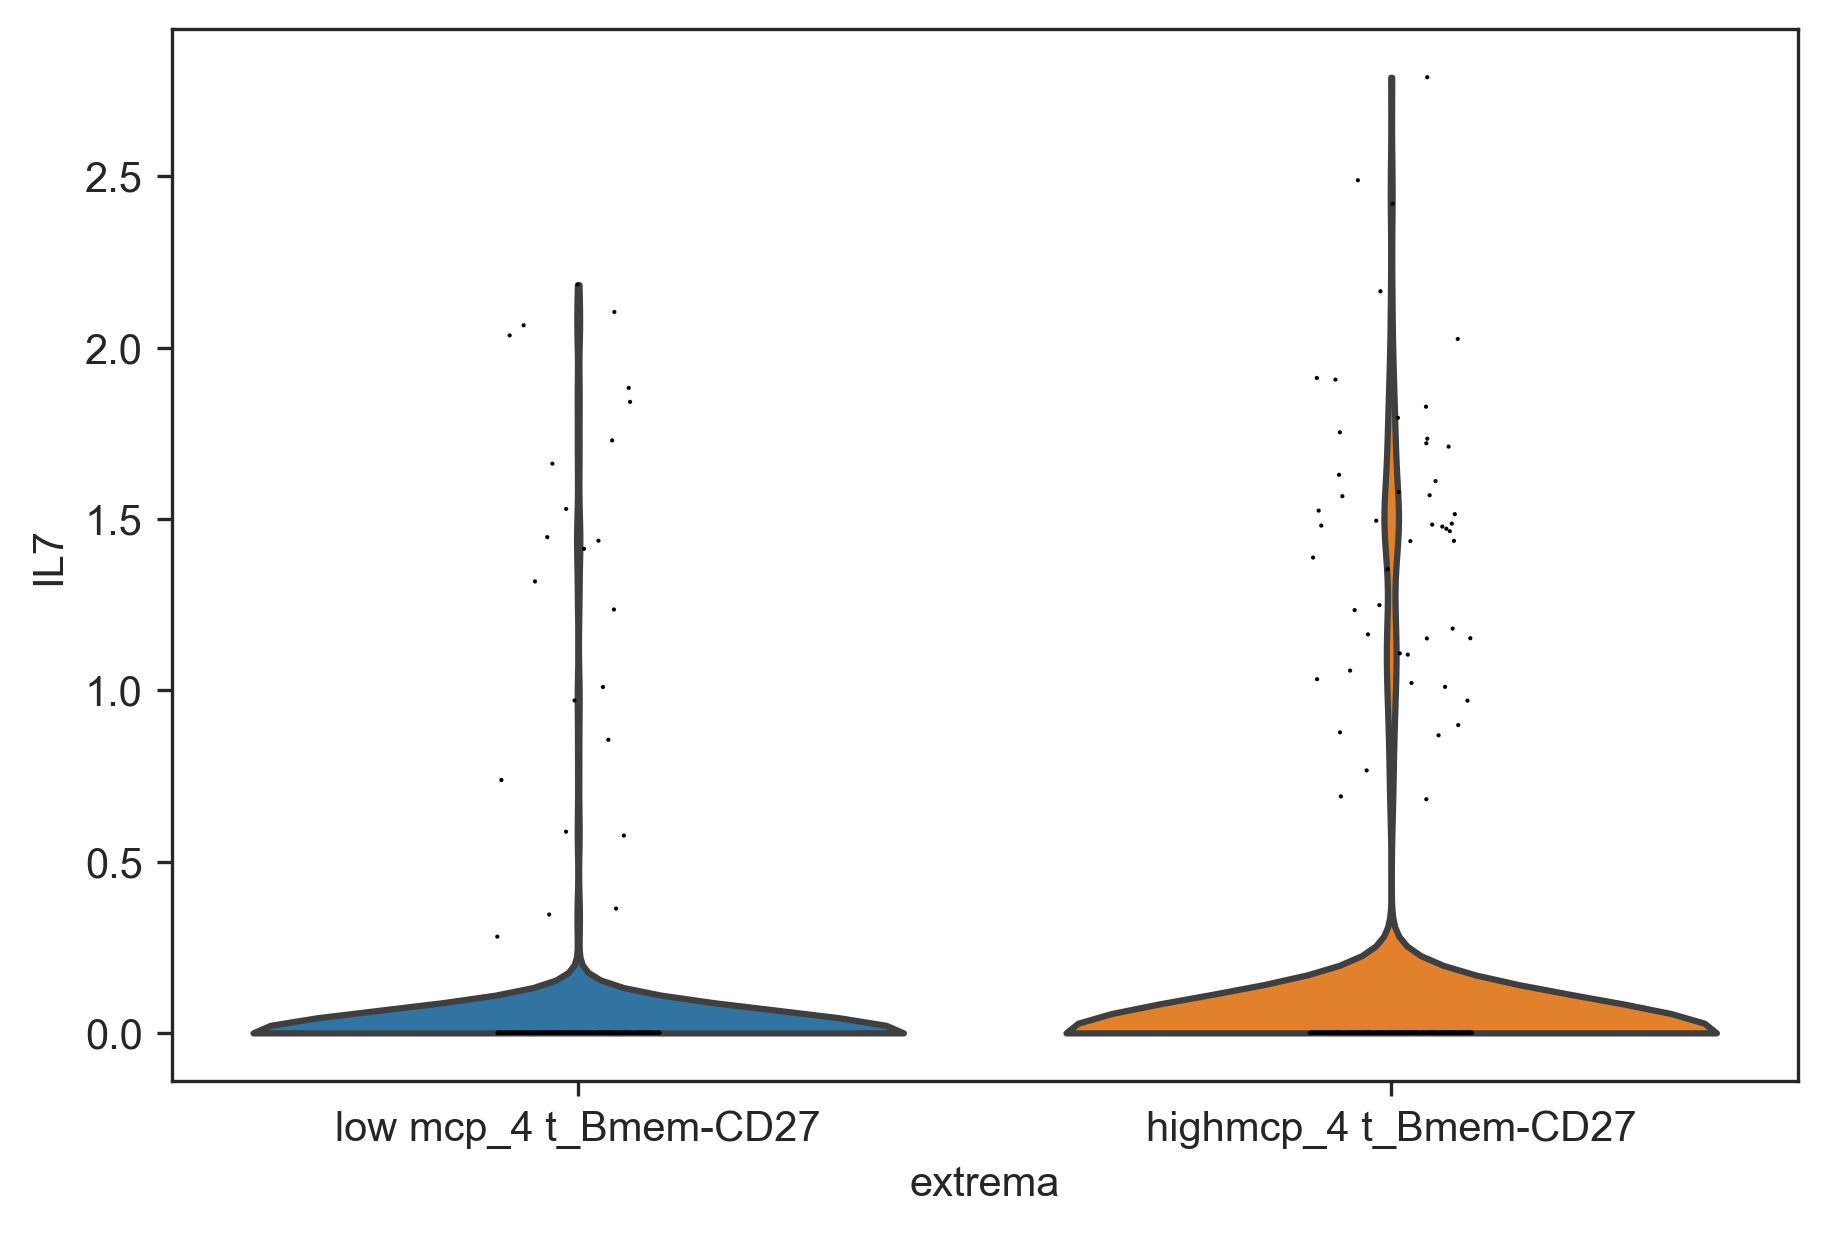

In [168]:
sc.pl.violin(mini,"IL7", groupby="extrema")

In [151]:
r_value

0.06698040930055682

In [152]:
p_value

1.0553428697365917e-08

In [186]:
micro = equal_subsampling(ct_subs['ct_subs_method2']['t_Bmem-CD27'], "Sample")

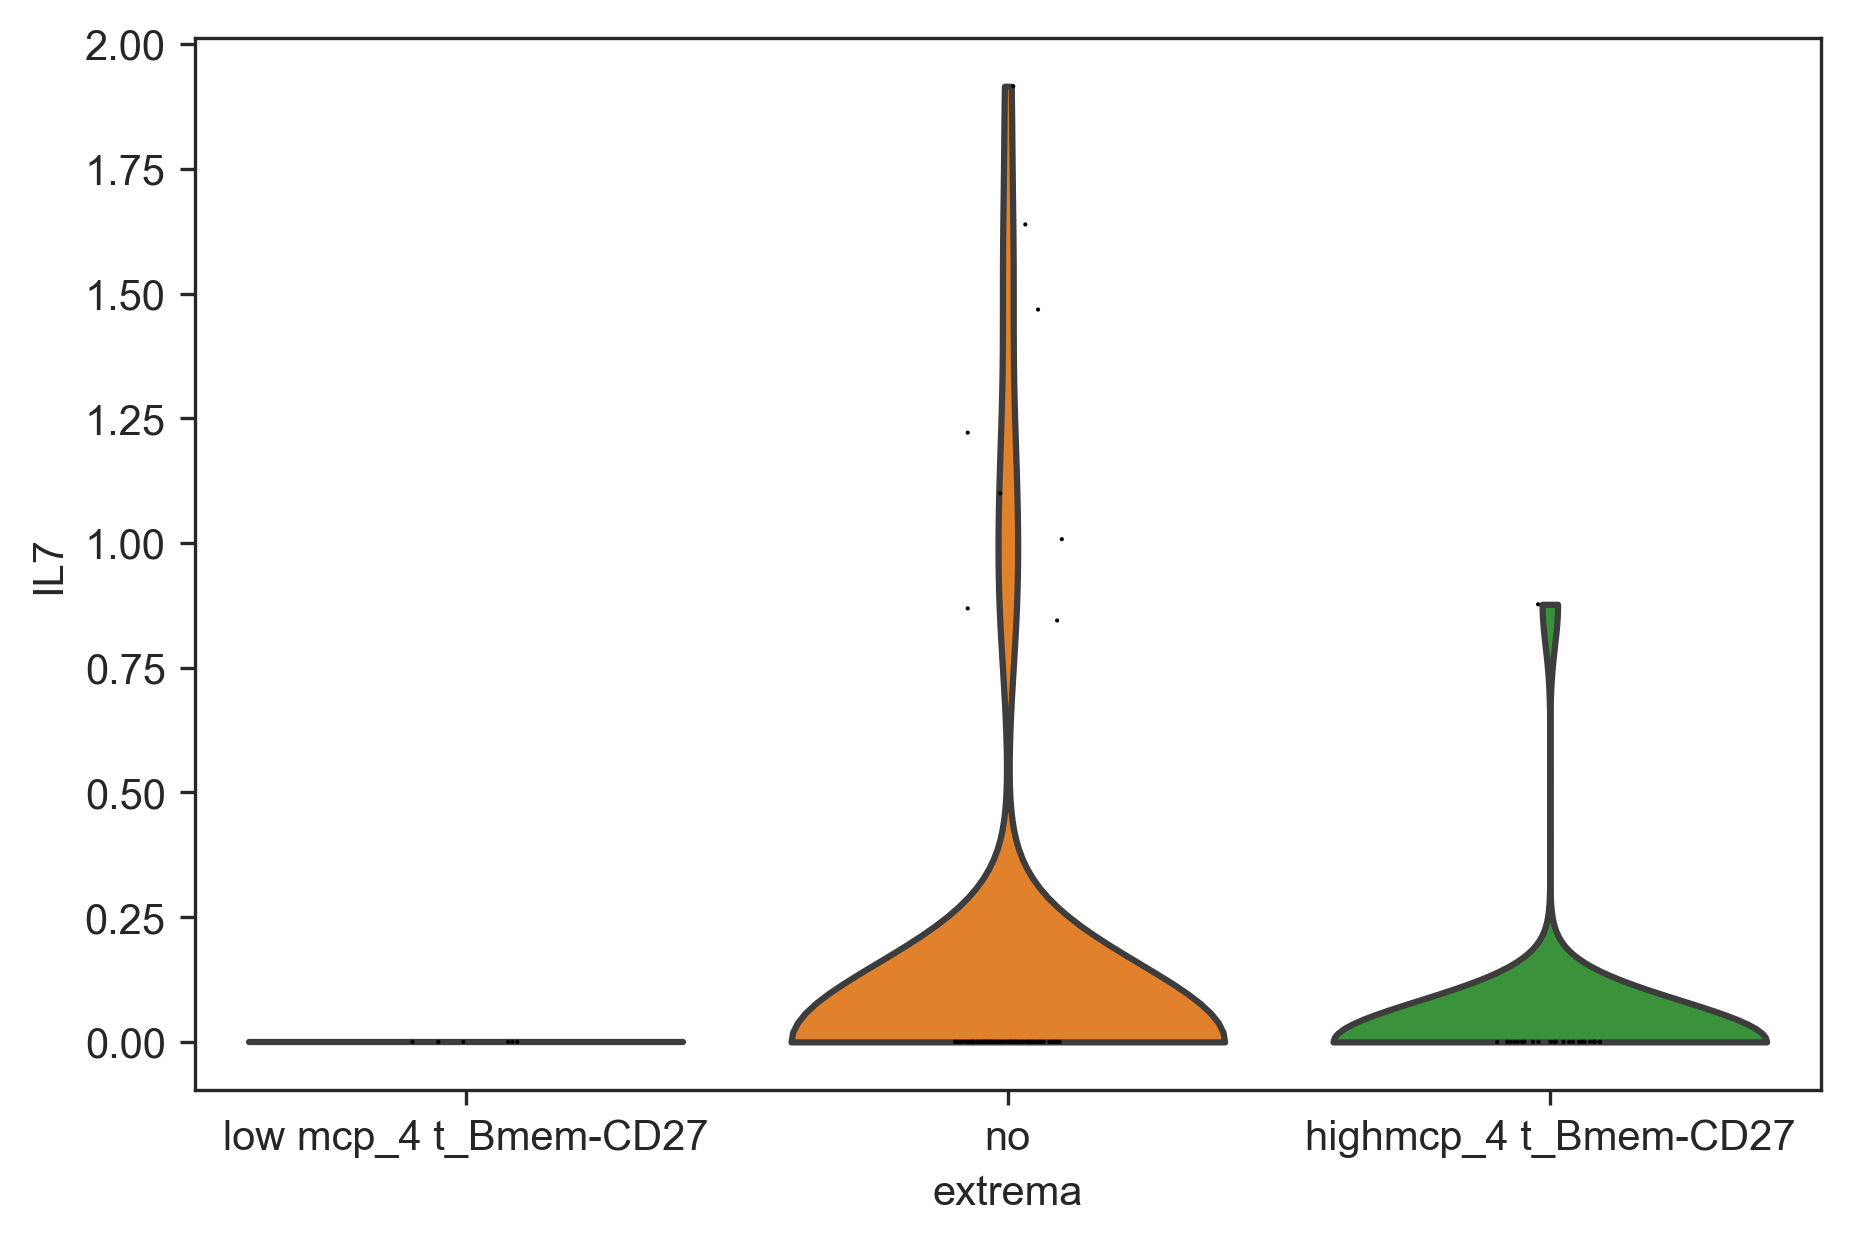

In [187]:
sc.pl.violin(micro,"IL7", groupby="extrema")

In [178]:
micro

AnnData object with n_obs × n_vars = 44 × 22173
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9', 'extrema'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'rank_genes_groups', 'Efficacy_colors', 'extrema_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

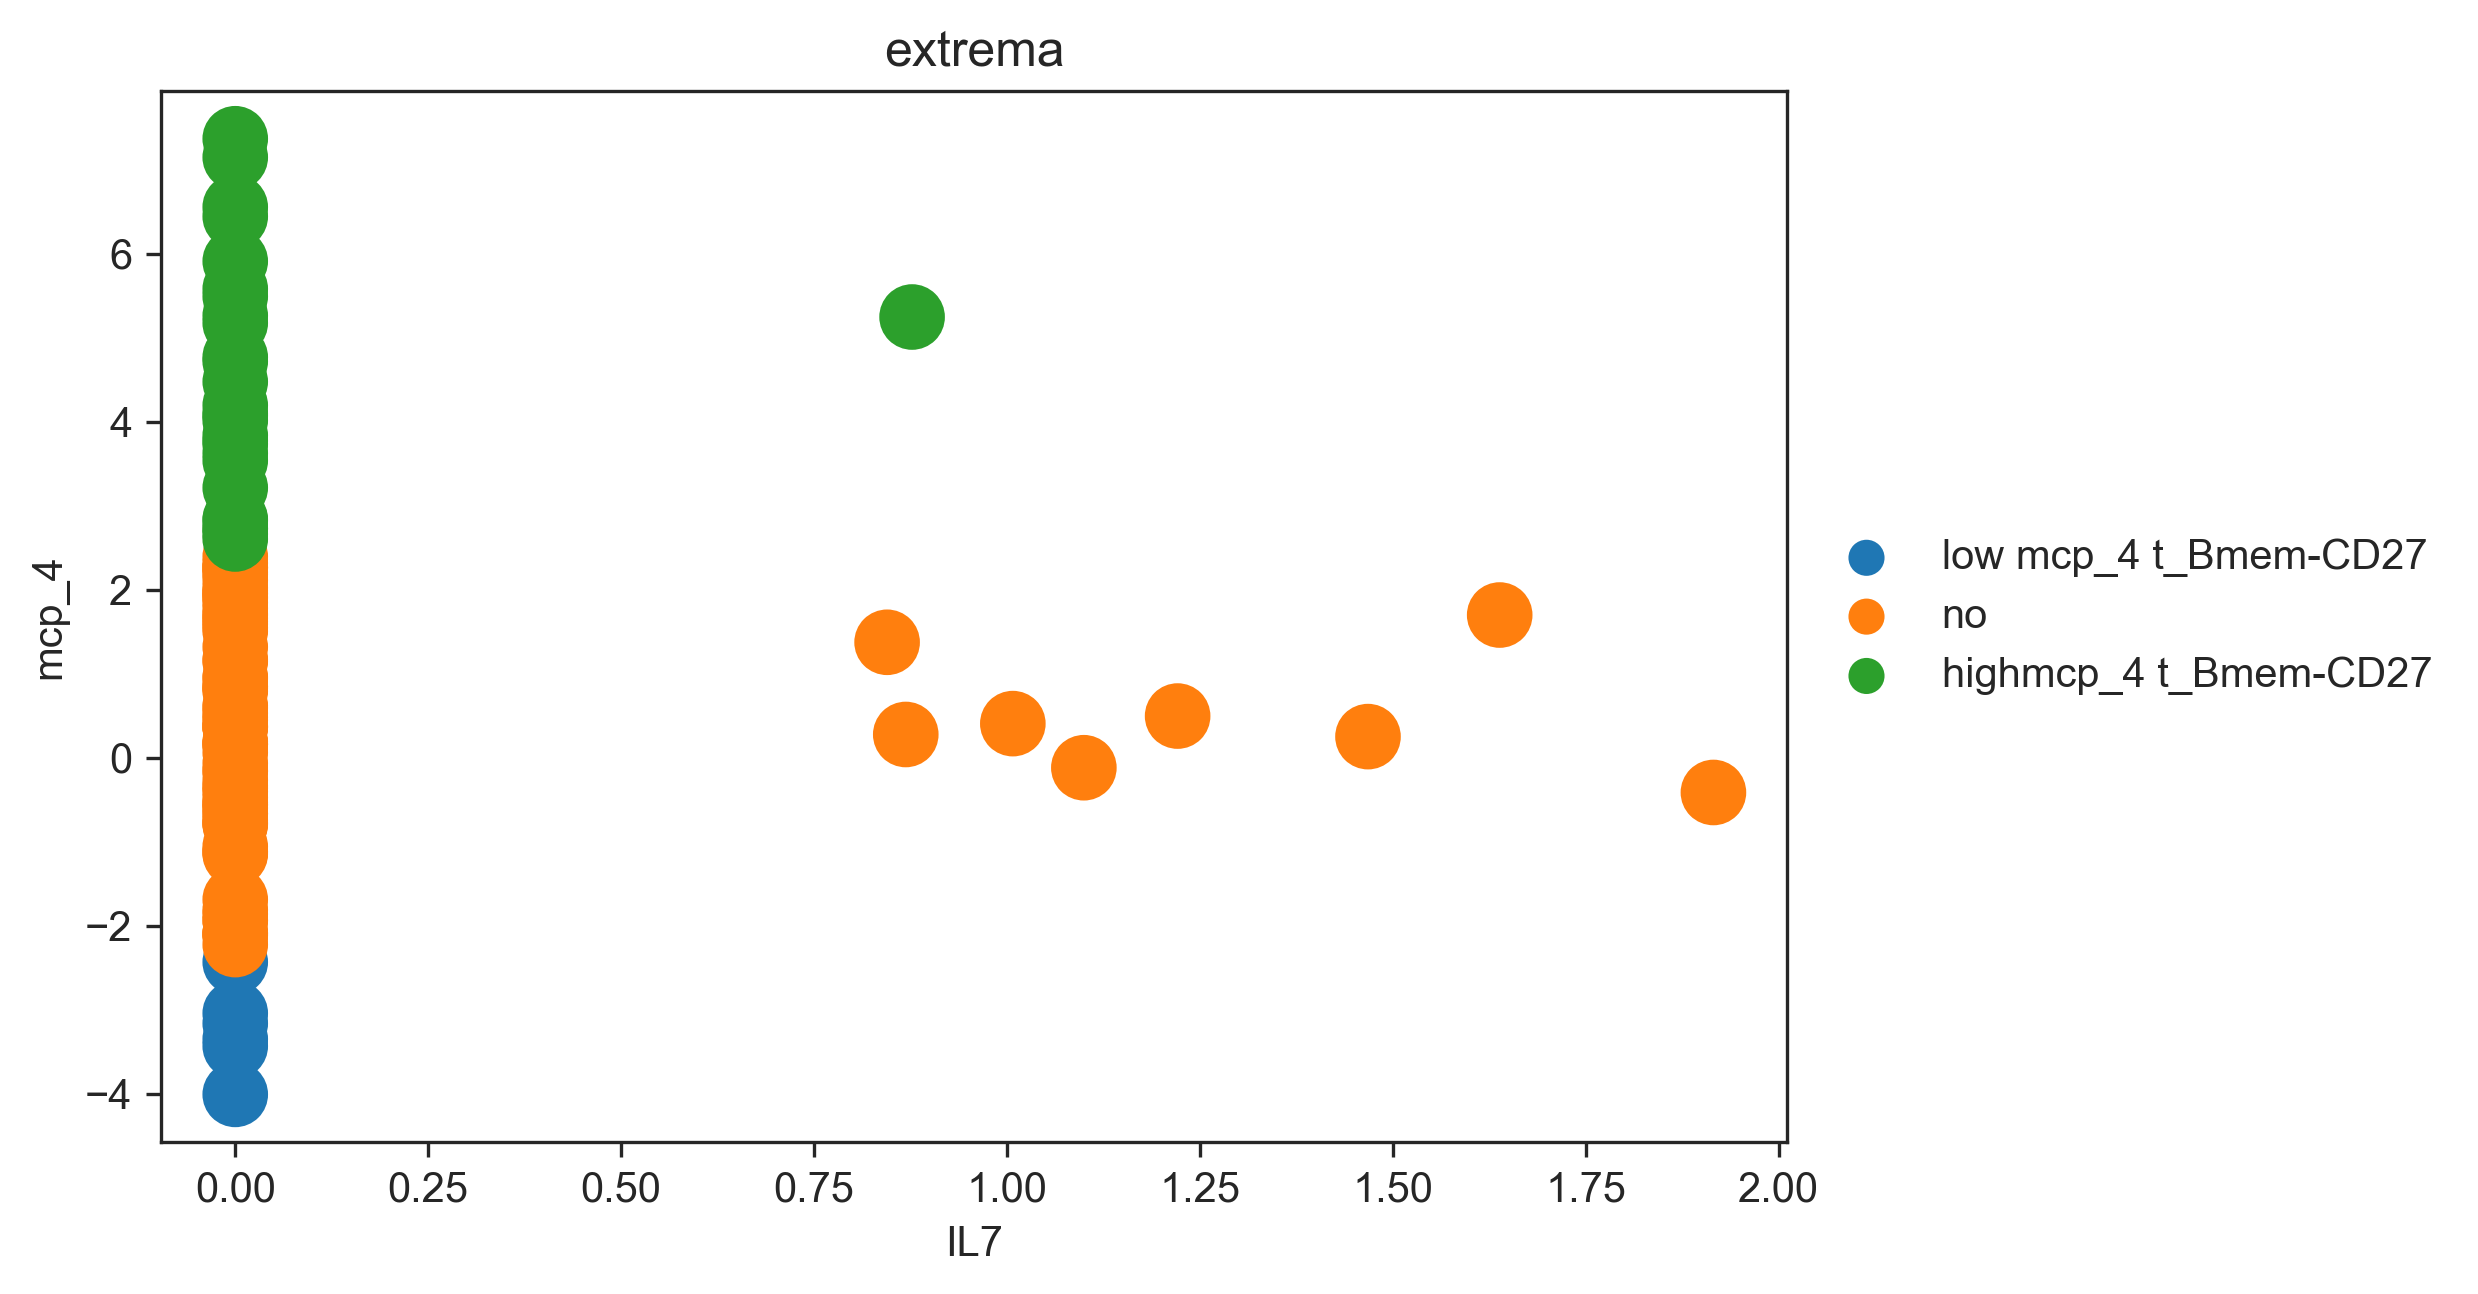

In [189]:

1
sc.pl.scatter(micro, x="IL7", y="mcp_4", color="extrema")

In [190]:
micro

AnnData object with n_obs × n_vars = 121 × 22173
    obs: 'Sample', 'Patient', 'Origin', 'Tissue', 'Efficacy', 'Group', 'Treatment', 'Number of counts', 'Number of genes', 'Major celltype', 'Cluster', 'mcp_0', 'mcp_1', 'mcp_2', 'mcp_3', 'mcp_4', 'mcp_5', 'mcp_6', 'mcp_7', 'mcp_8', 'mcp_9', 'extrema'
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'rank_genes_groups', 'Efficacy_colors', 'extrema_colors'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'